In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import datetime
import wordcloud
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

In [2]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [3]:
df = pd.read_csv("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/CAvideos.csv", index_col='video_id')

with open("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/CA_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
counts_titles = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [4]:
df.head(2)

trending_date                                       title  \
video_id                                                                
n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. Beyoncé   
0dBIkQ4Mz1M      17.14.11               PLUSH - Bad Unboxing Fan Mail   

            channel_title  category_id              publish_time  \
video_id                                                           
n1WpP7iowLc    EminemVEVO           10  2017-11-10T17:00:03.000Z   
0dBIkQ4Mz1M     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                          tags     views  \
video_id                                                                   
n1WpP7iowLc  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   
0dBIkQ4Mz1M  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   

              likes  dislikes  comment_count  \
video_id                                       
n1WpP7iowLc  787425     43420         125882   
0dBIkQ4Mz1M  127794      1688          13030   

                                             thumbnail_link  \
video_id                                                      
n1WpP7iowLc  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
0dBIkQ4Mz1M  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
n1WpP7iowLc              False             False                   False   
0dBIkQ4Mz1M              False             False                   False   

                                                   description category_name  
video_id                                                                      
n1WpP7iowLc  Eminem's new track Walk on Water ft. Beyoncé i...         Music  
0dBIkQ4Mz1M  STill got a lot of packages. Probably will las...        Comedy

In [5]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 16 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
category_name             40807 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


In [7]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(1)

trending_date                             title channel_title  \
video_id                                                                    
lHcXhBojpeQ      17.14.11  三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！         明星百曉生   

             category_id              publish_time    tags  views  likes  \
video_id                                                                   
lHcXhBojpeQ           22  2017-11-12T12:49:50.000Z  [none]  88061     47   

             dislikes  comment_count  \
video_id                               
lHcXhBojpeQ        58             17   

                                             thumbnail_link  \
video_id                                                      
lHcXhBojpeQ  https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
lHcXhBojpeQ              False             False                   False   

            description   category_name  
video_id                                 
lHcXhBojpeQ         NaN  People & Blogs

In [8]:
df["description"] = df["description"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 16 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               40881 non-null object
category_name             40807 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


In [9]:
df[df["category_name"].apply(lambda x: pd.isnull(x))].head(1)

trending_date                                              title  \
video_id                                                                       
0gLWN3uq74o      17.14.11  Ex-intelligence chiefs fire back at Trump crit...   

            channel_title  category_id              publish_time  \
video_id                                                           
0gLWN3uq74o           CNN           29  2017-11-12T15:36:51.000Z   

                                                          tags   views  likes  \
video_id                                                                        
0gLWN3uq74o  James Clapper|"John Brennan"|"President Trump"...  286231   2530   

             dislikes  comment_count  \
video_id                               
0gLWN3uq74o      1127           3239   

                                             thumbnail_link  \
video_id                                                      
0gLWN3uq74o  https://i.ytimg.com/vi/0gLWN3uq74o/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
0gLWN3uq74o              False             False                   False   

                                                   description category_name  
video_id                                                                      
0gLWN3uq74o  Former Director of National Intelligence James...           NaN

In [10]:
df["category_name"] = df["category_name"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40881 entries, n1WpP7iowLc to POTgw38-m58
Data columns (total 16 columns):
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               40881 non-null object
category_name             40881 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


In [12]:
df[['category_id', 'category_name']].head()

category_id  category_name
video_id                               
n1WpP7iowLc           10          Music
0dBIkQ4Mz1M           23         Comedy
5qpjK5DgCt4           23         Comedy
d380meD0W0M           24  Entertainment
2Vv-BfVoq4g           10          Music

In [13]:
category_count = df['category_name'].value_counts() # frequency for each category
category_count

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
                           74
Movies                      6
Name: category_name, dtype: int64

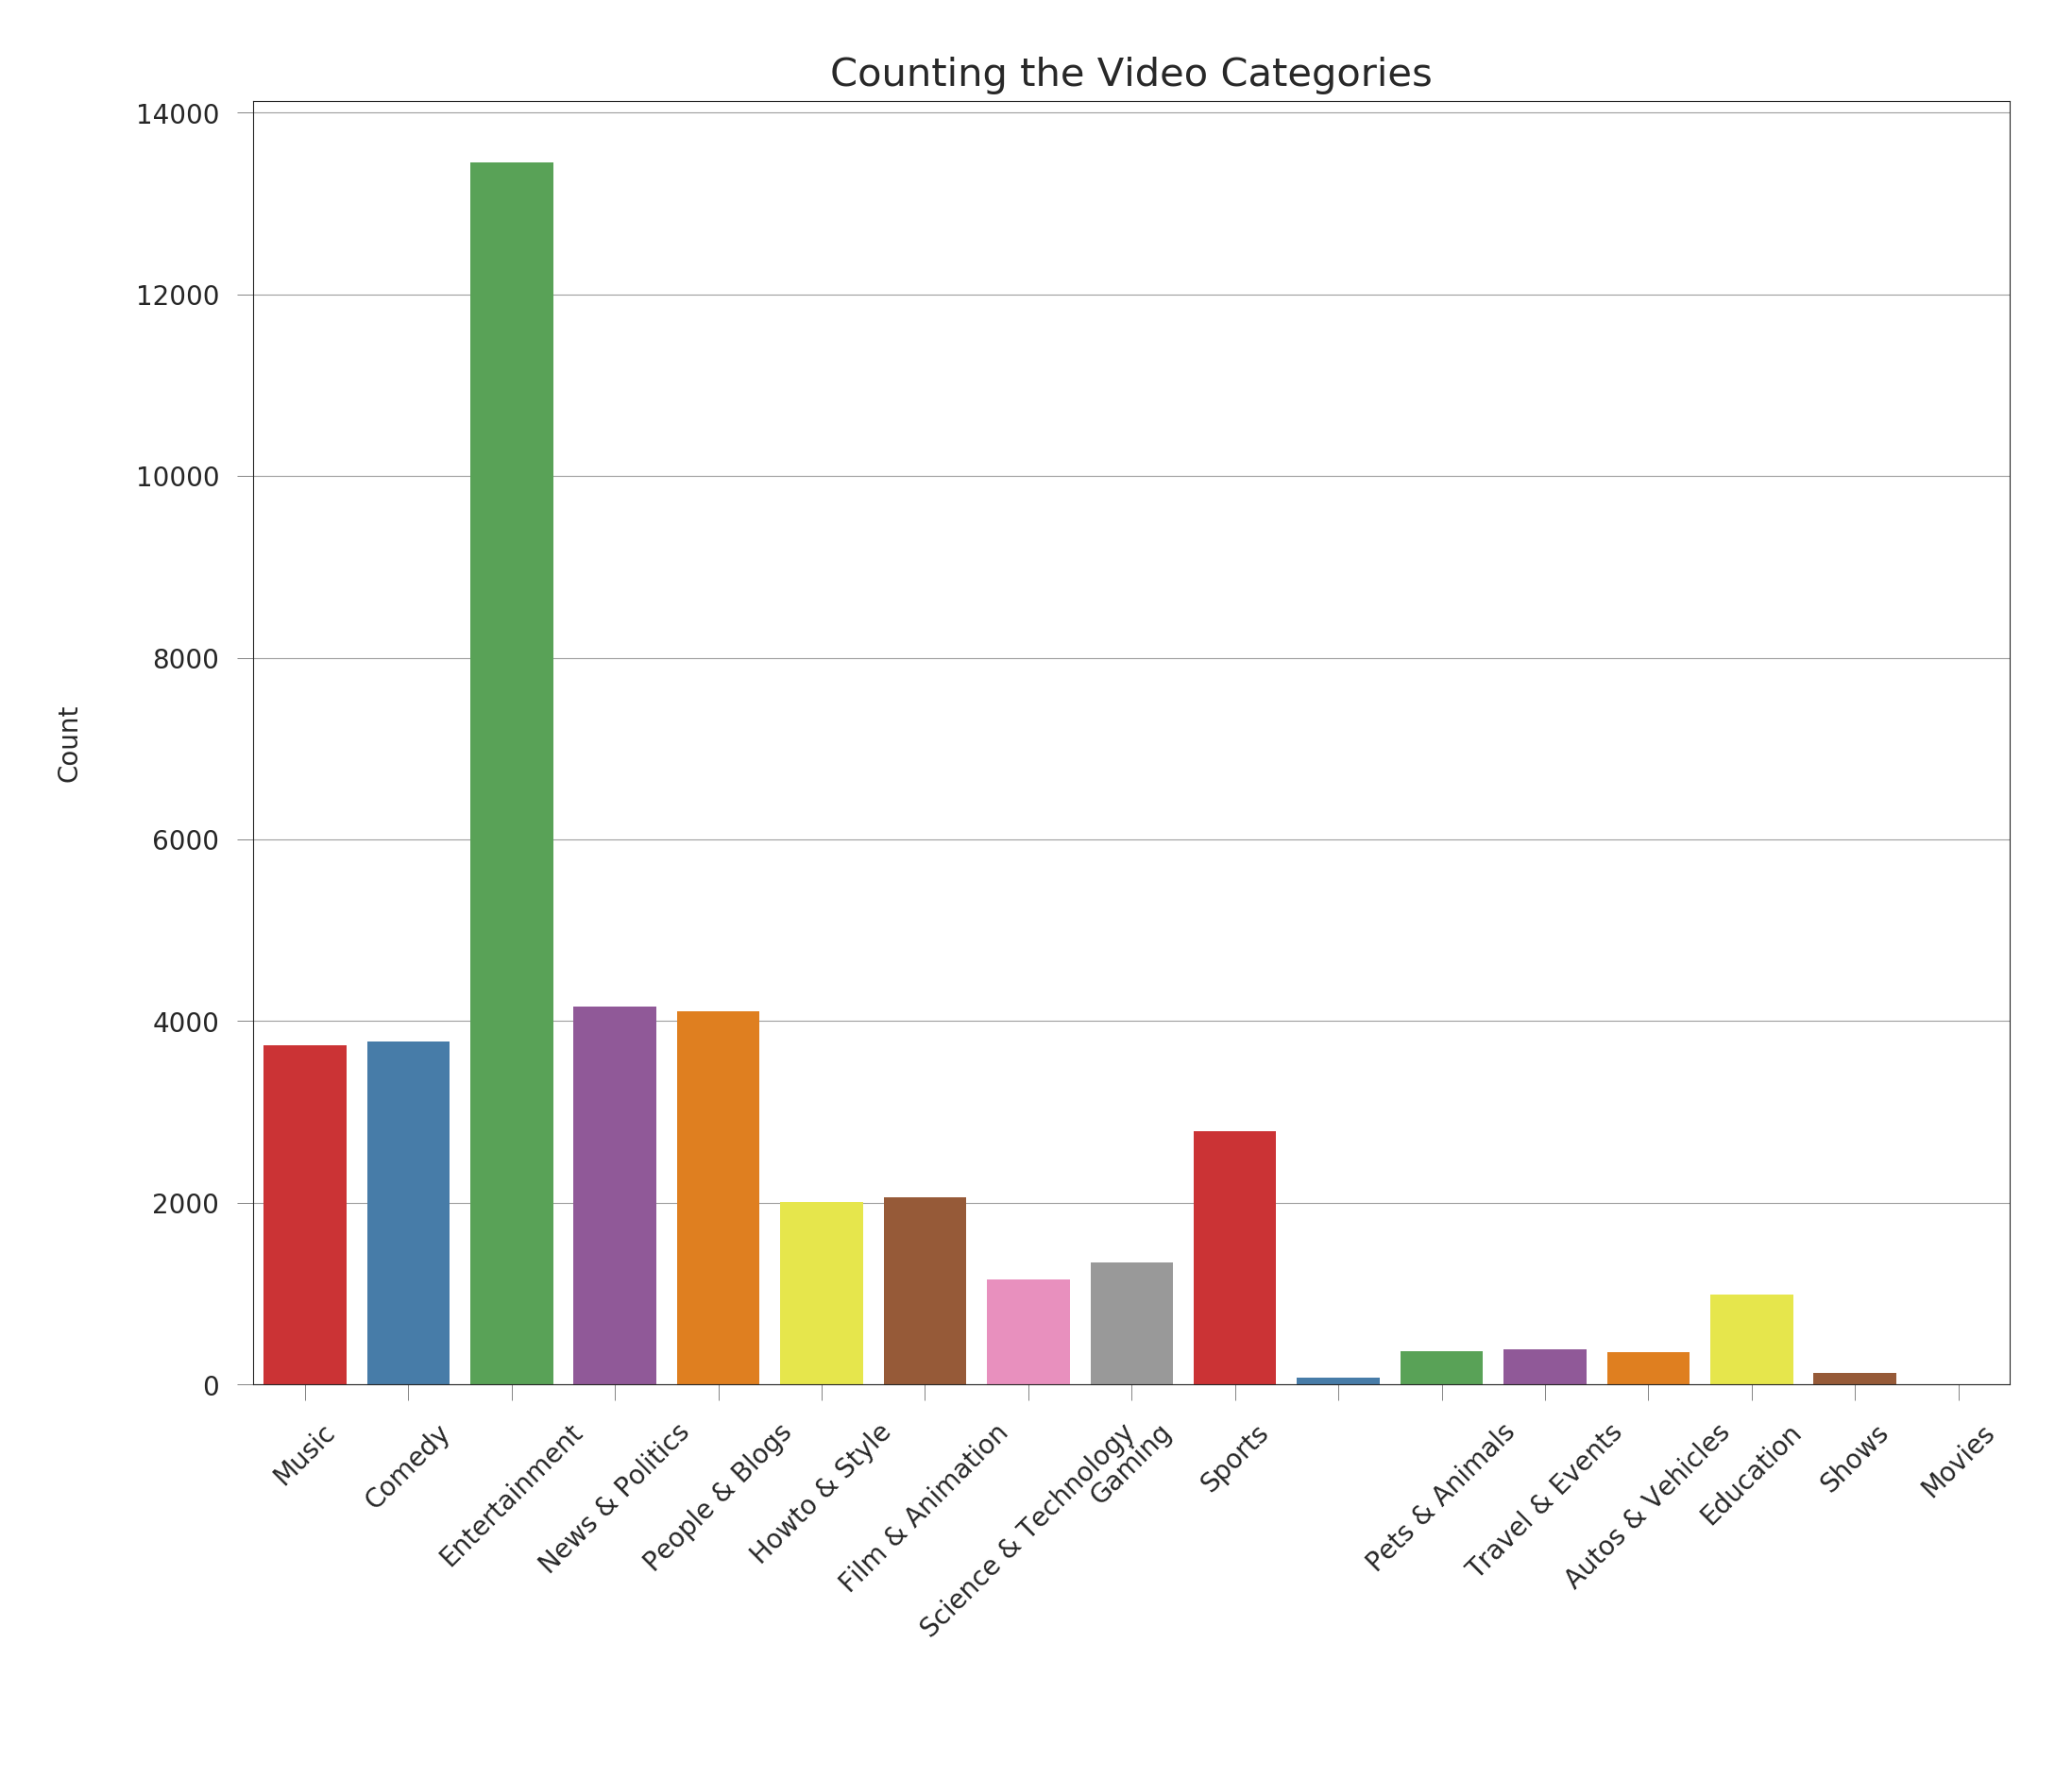

In [14]:
plt.figure(figsize = (12,9))

g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Categories", fontsize=15)
g.set_xlabel(" ", fontsize=10)
g.set_ylabel("Count", fontsize=10);

In [15]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

video_id
n1WpP7iowLc   2017-11-14
0dBIkQ4Mz1M   2017-11-14
5qpjK5DgCt4   2017-11-14
d380meD0W0M   2017-11-14
2Vv-BfVoq4g   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [16]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
n1WpP7iowLc   2017-11-10 17:00:03
0dBIkQ4Mz1M   2017-11-13 17:00:00
5qpjK5DgCt4   2017-11-12 19:05:24
d380meD0W0M   2017-11-12 18:01:41
2Vv-BfVoq4g   2017-11-09 11:04:14
Name: publish_time, dtype: datetime64[ns]

In [17]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [18]:
df.describe()

views      likes   dislikes  comment_count
count     40881.00   40881.00   40881.00       40881.00
mean    1147035.91   39582.69    2009.20        5042.97
std     3390913.02  132689.53   19008.37       21579.02
min         733.00       0.00       0.00           0.00
25%      143902.00    2191.00      99.00         417.00
50%      371204.00    8780.00     303.00        1301.00
75%      963302.00   28717.00     950.00        3713.00
max   137843120.00 5053338.00 1602383.00     1114800.00

In [19]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.83      0.56           0.69
likes           0.83   1.00      0.46           0.84
dislikes        0.56   0.46      1.00           0.64
comment_count   0.69   0.84      0.64           1.00

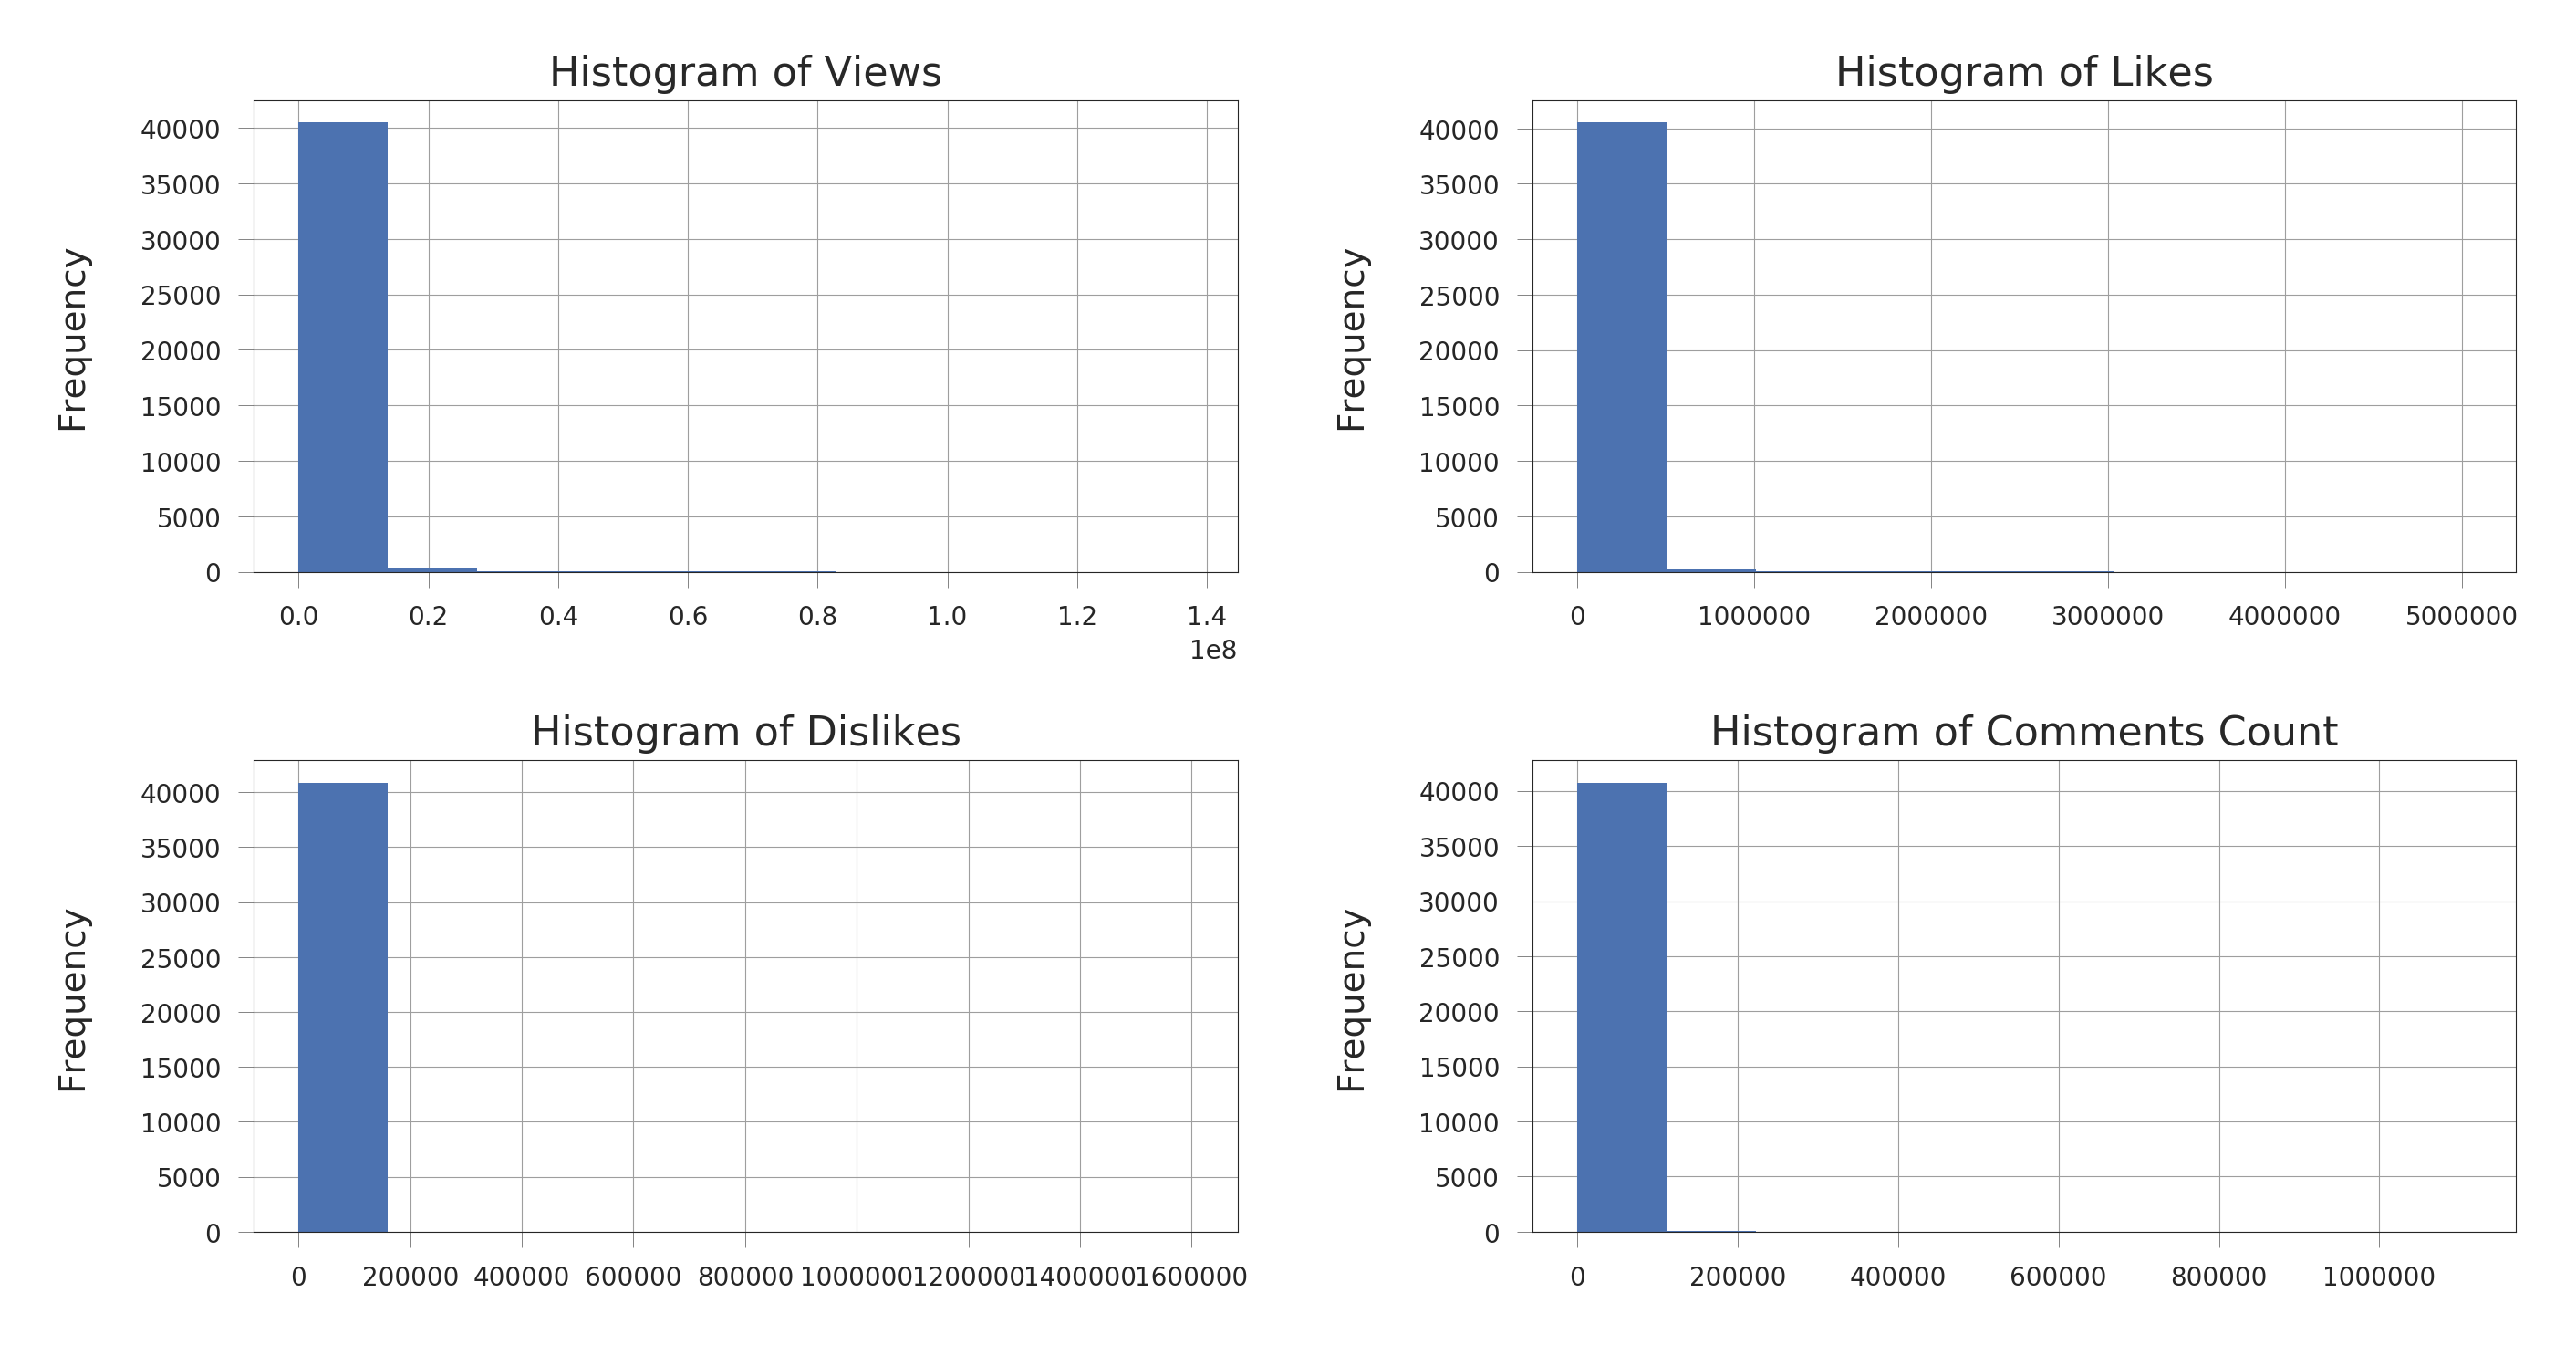

In [20]:
plt.figure(figsize = (16,8))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.9)
plt.show();

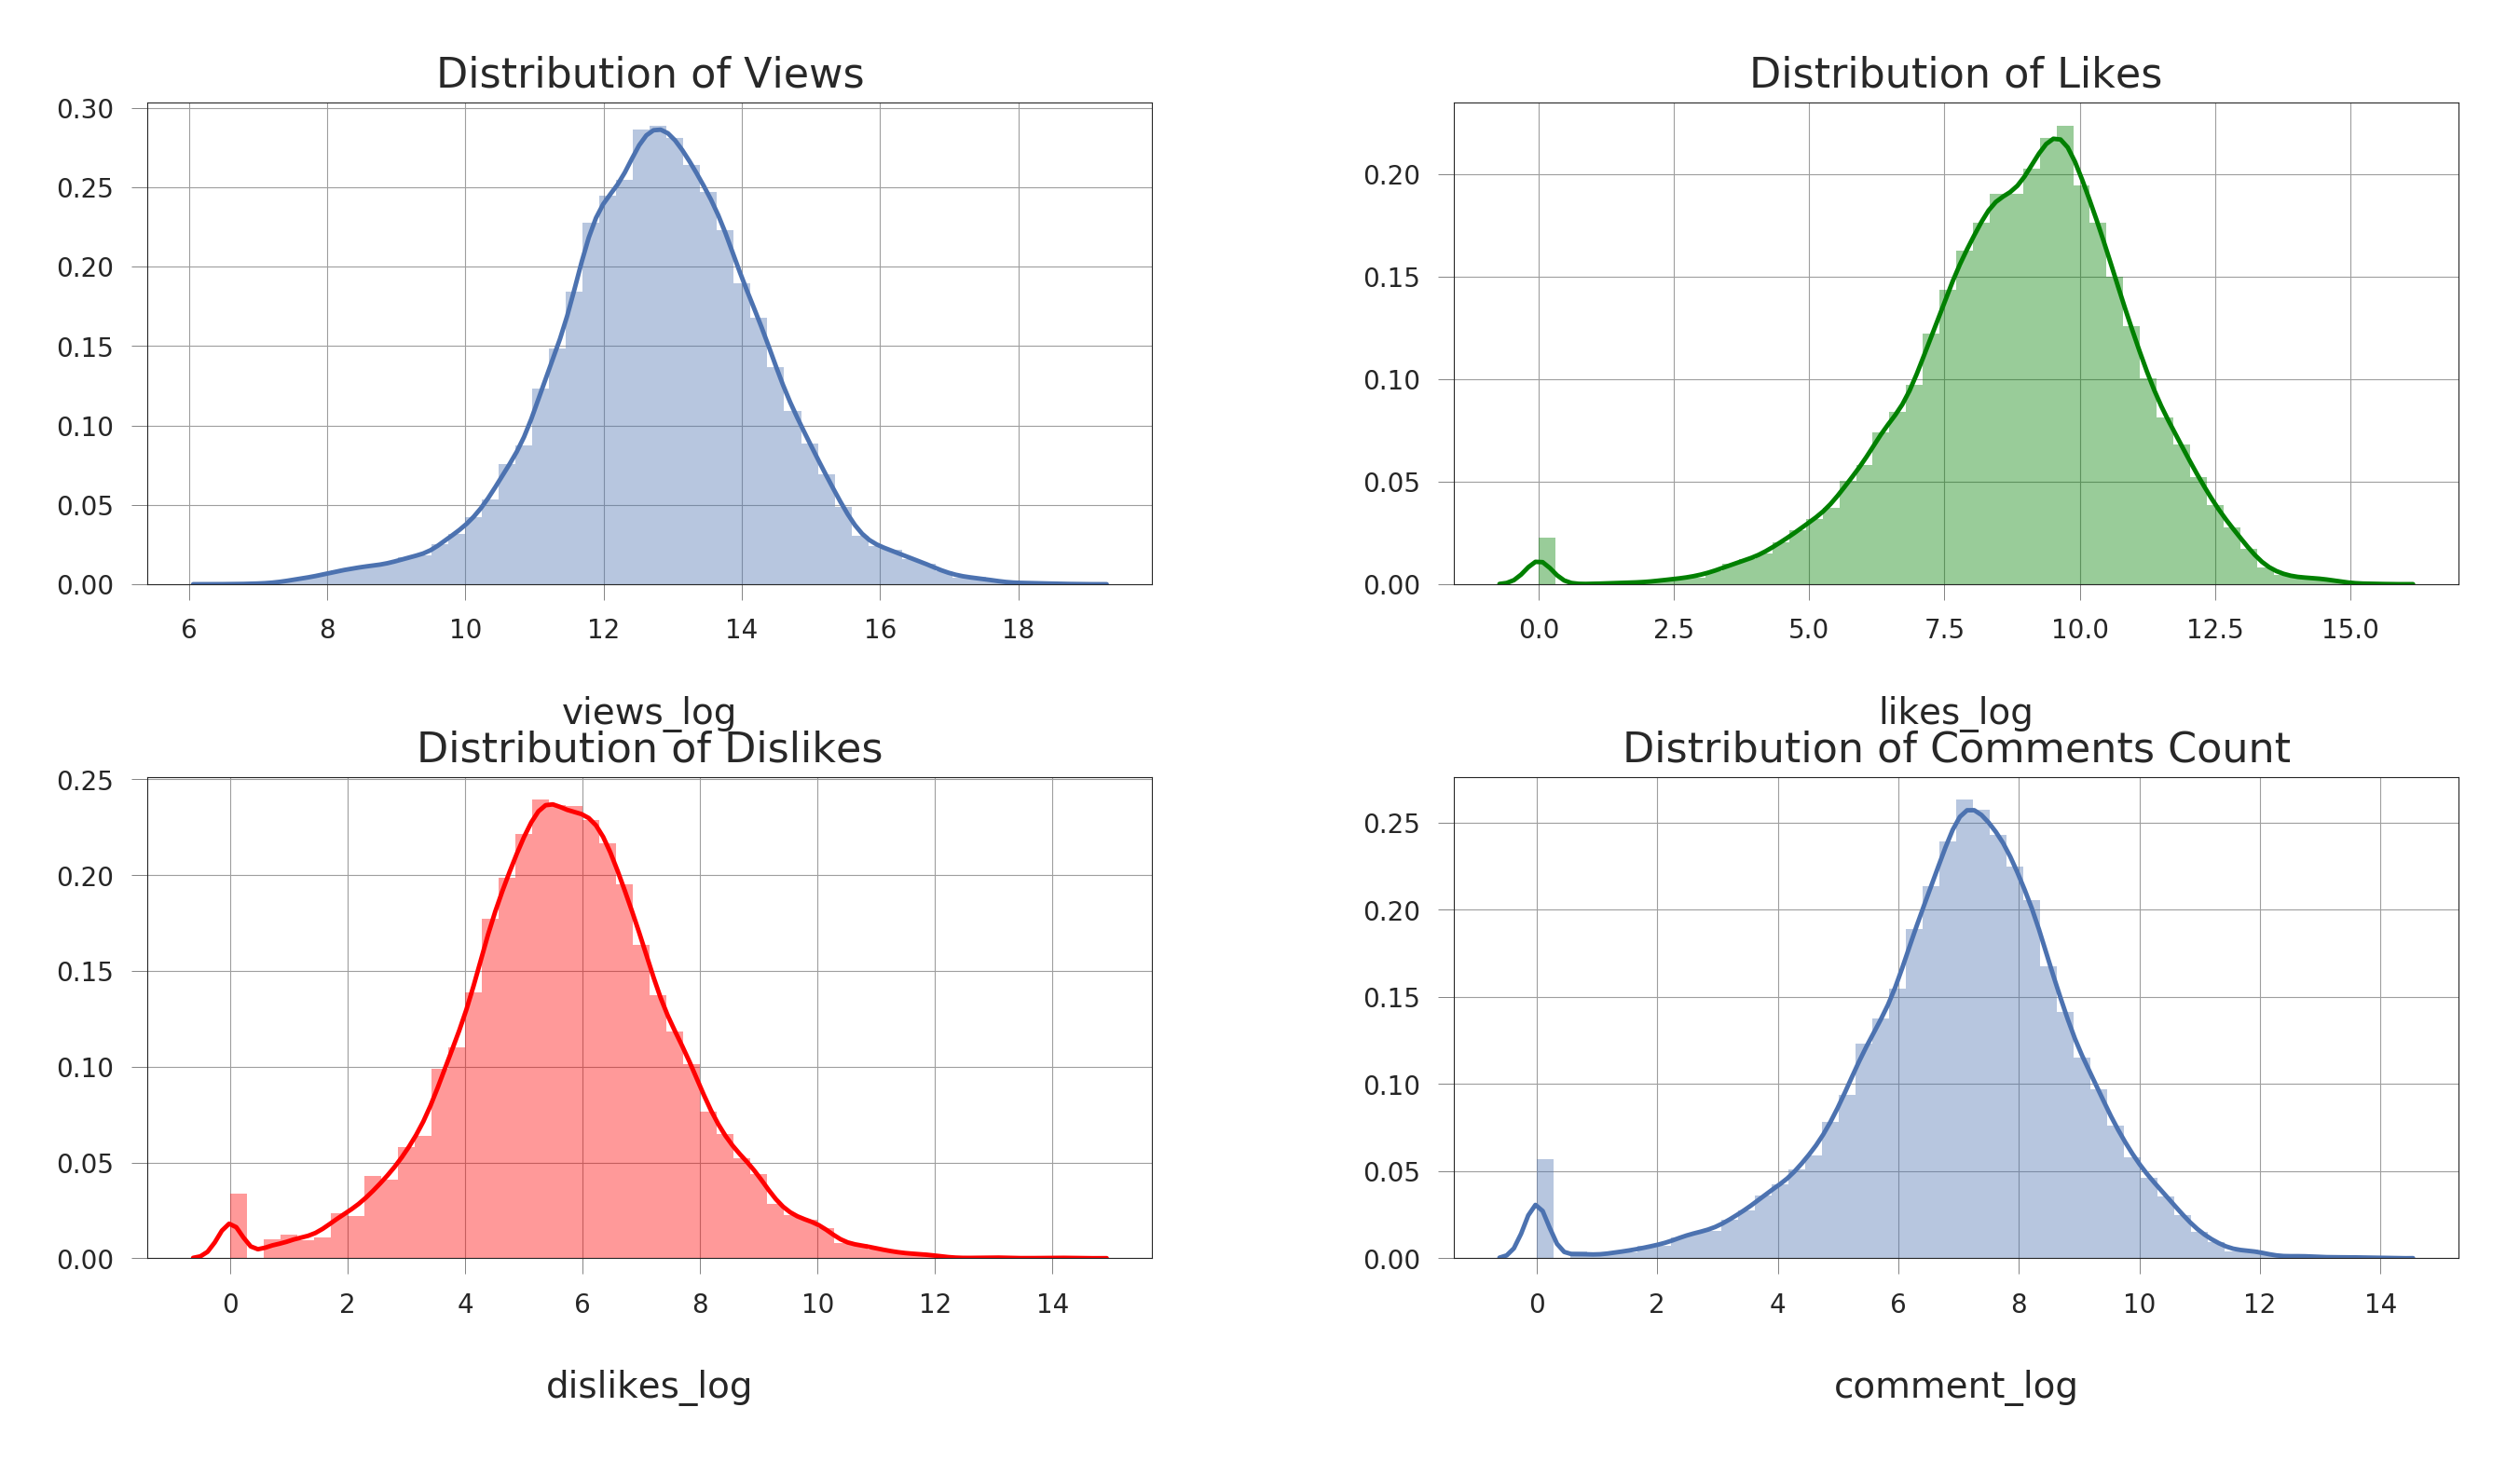

In [21]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


plt.figure(figsize = (16,8))

plt.subplot(221)
l1 = sns.distplot(df['views_log'])
l1.set_title("Distribution of Views", fontsize=16)

plt.subplot(222)
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('Distribution of Likes', fontsize=16)

plt.subplot(223)
l3 = sns.distplot(df['dislikes_log'], color='r')
l3.set_title("Distribution of Dislikes", fontsize=16)

plt.subplot(224)
l4 = sns.distplot(df['comment_log'])
l4.set_title("Distribution of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.9)
plt.show();

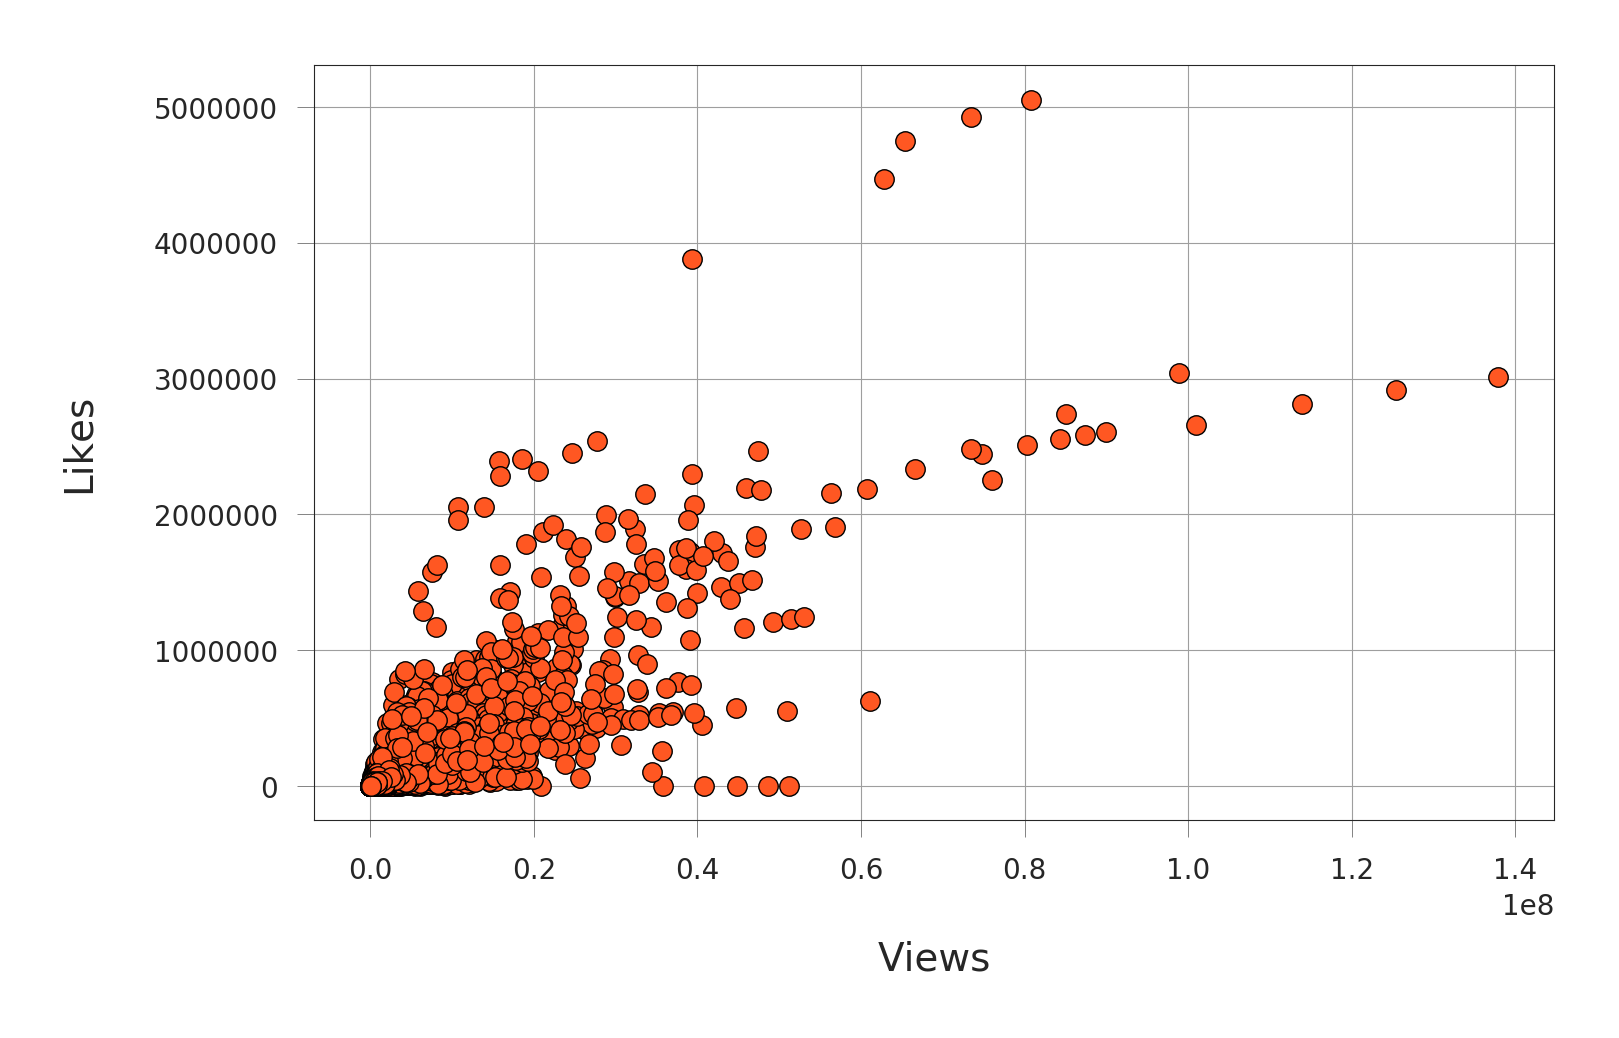

In [22]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

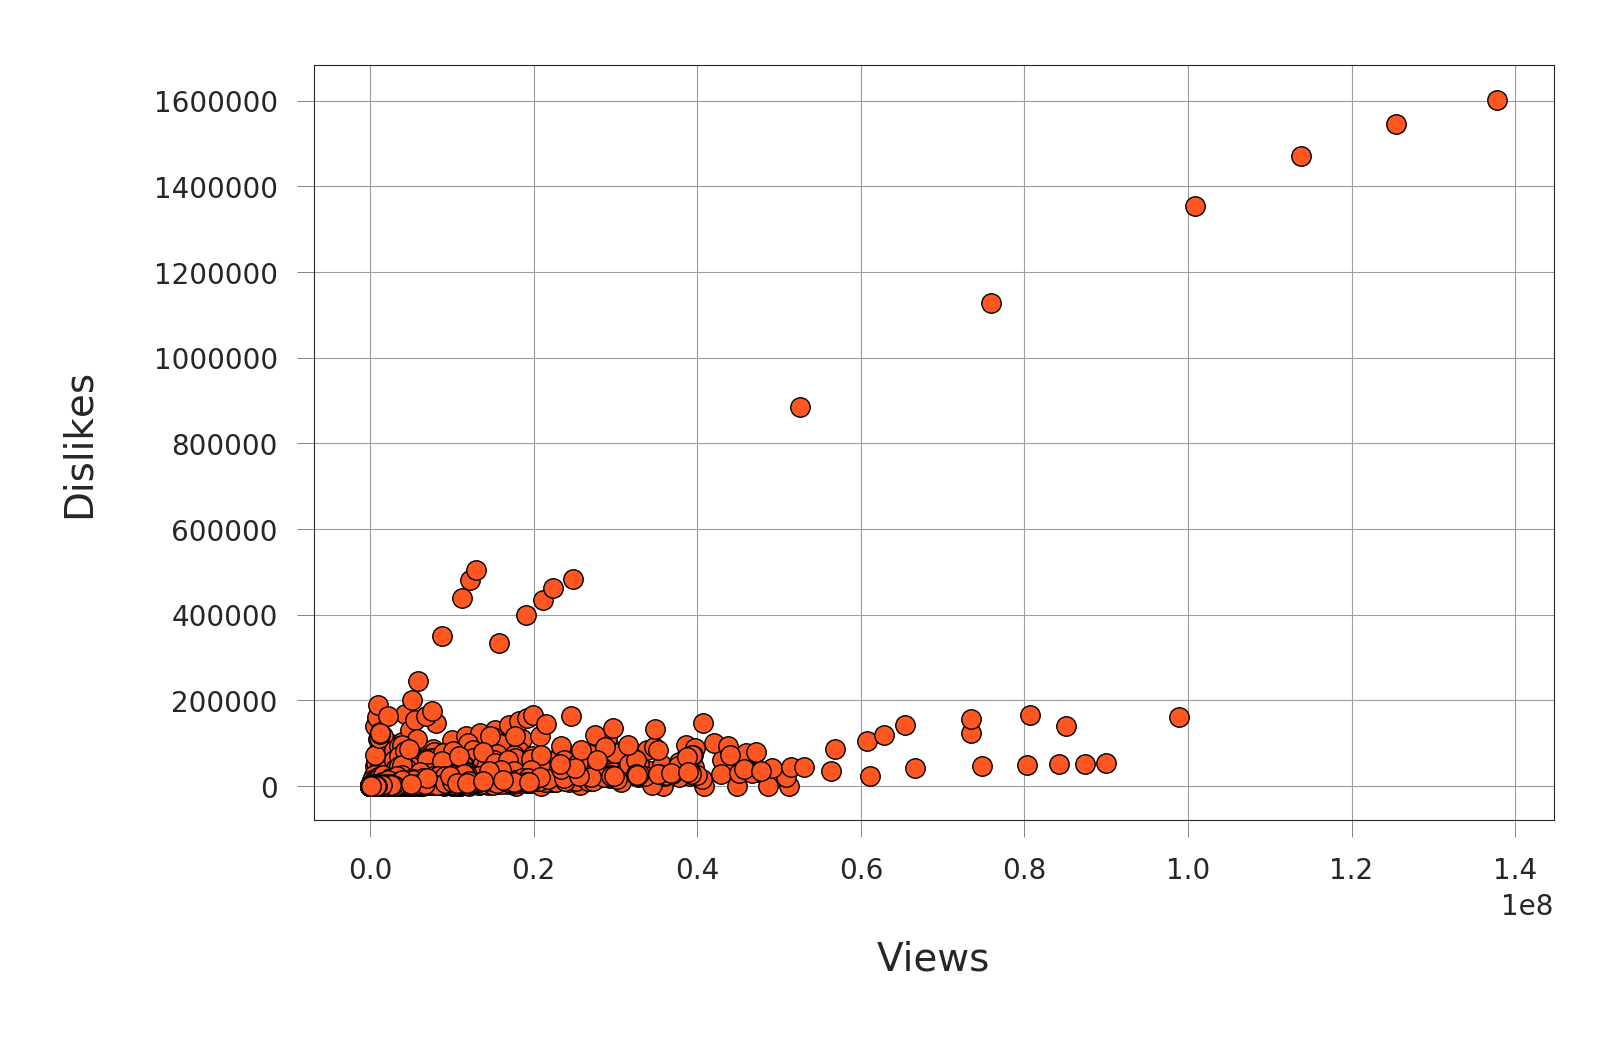

In [23]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Dislikes");

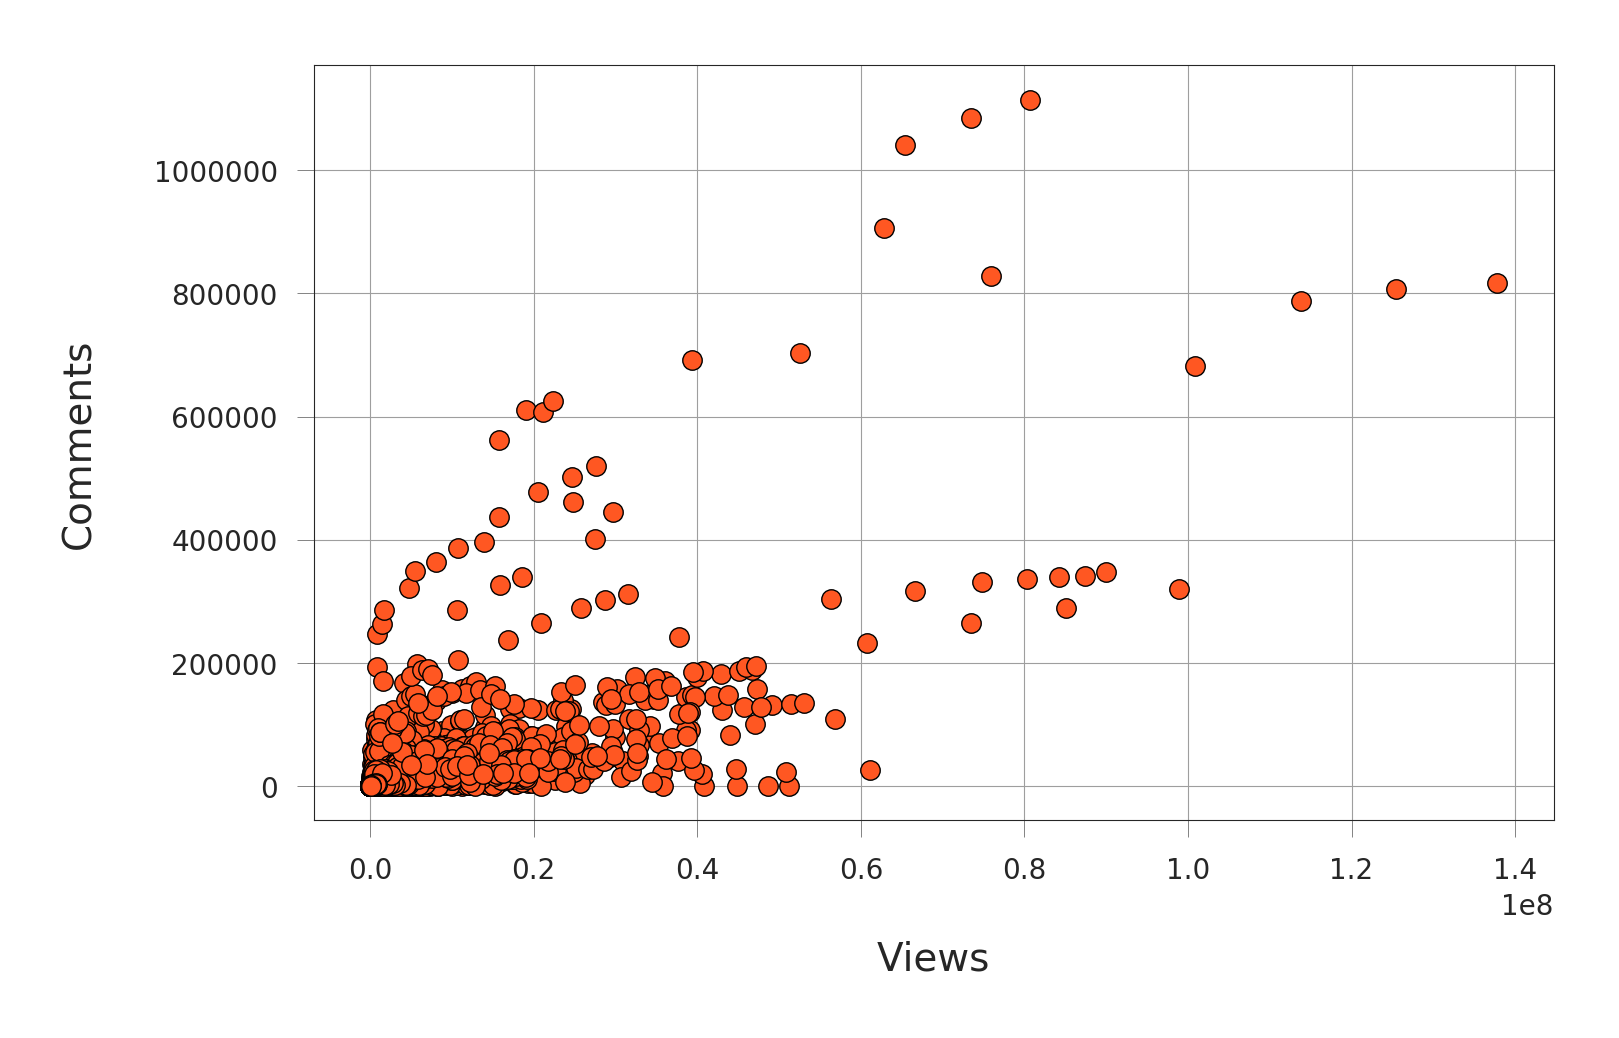

In [24]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Comments");

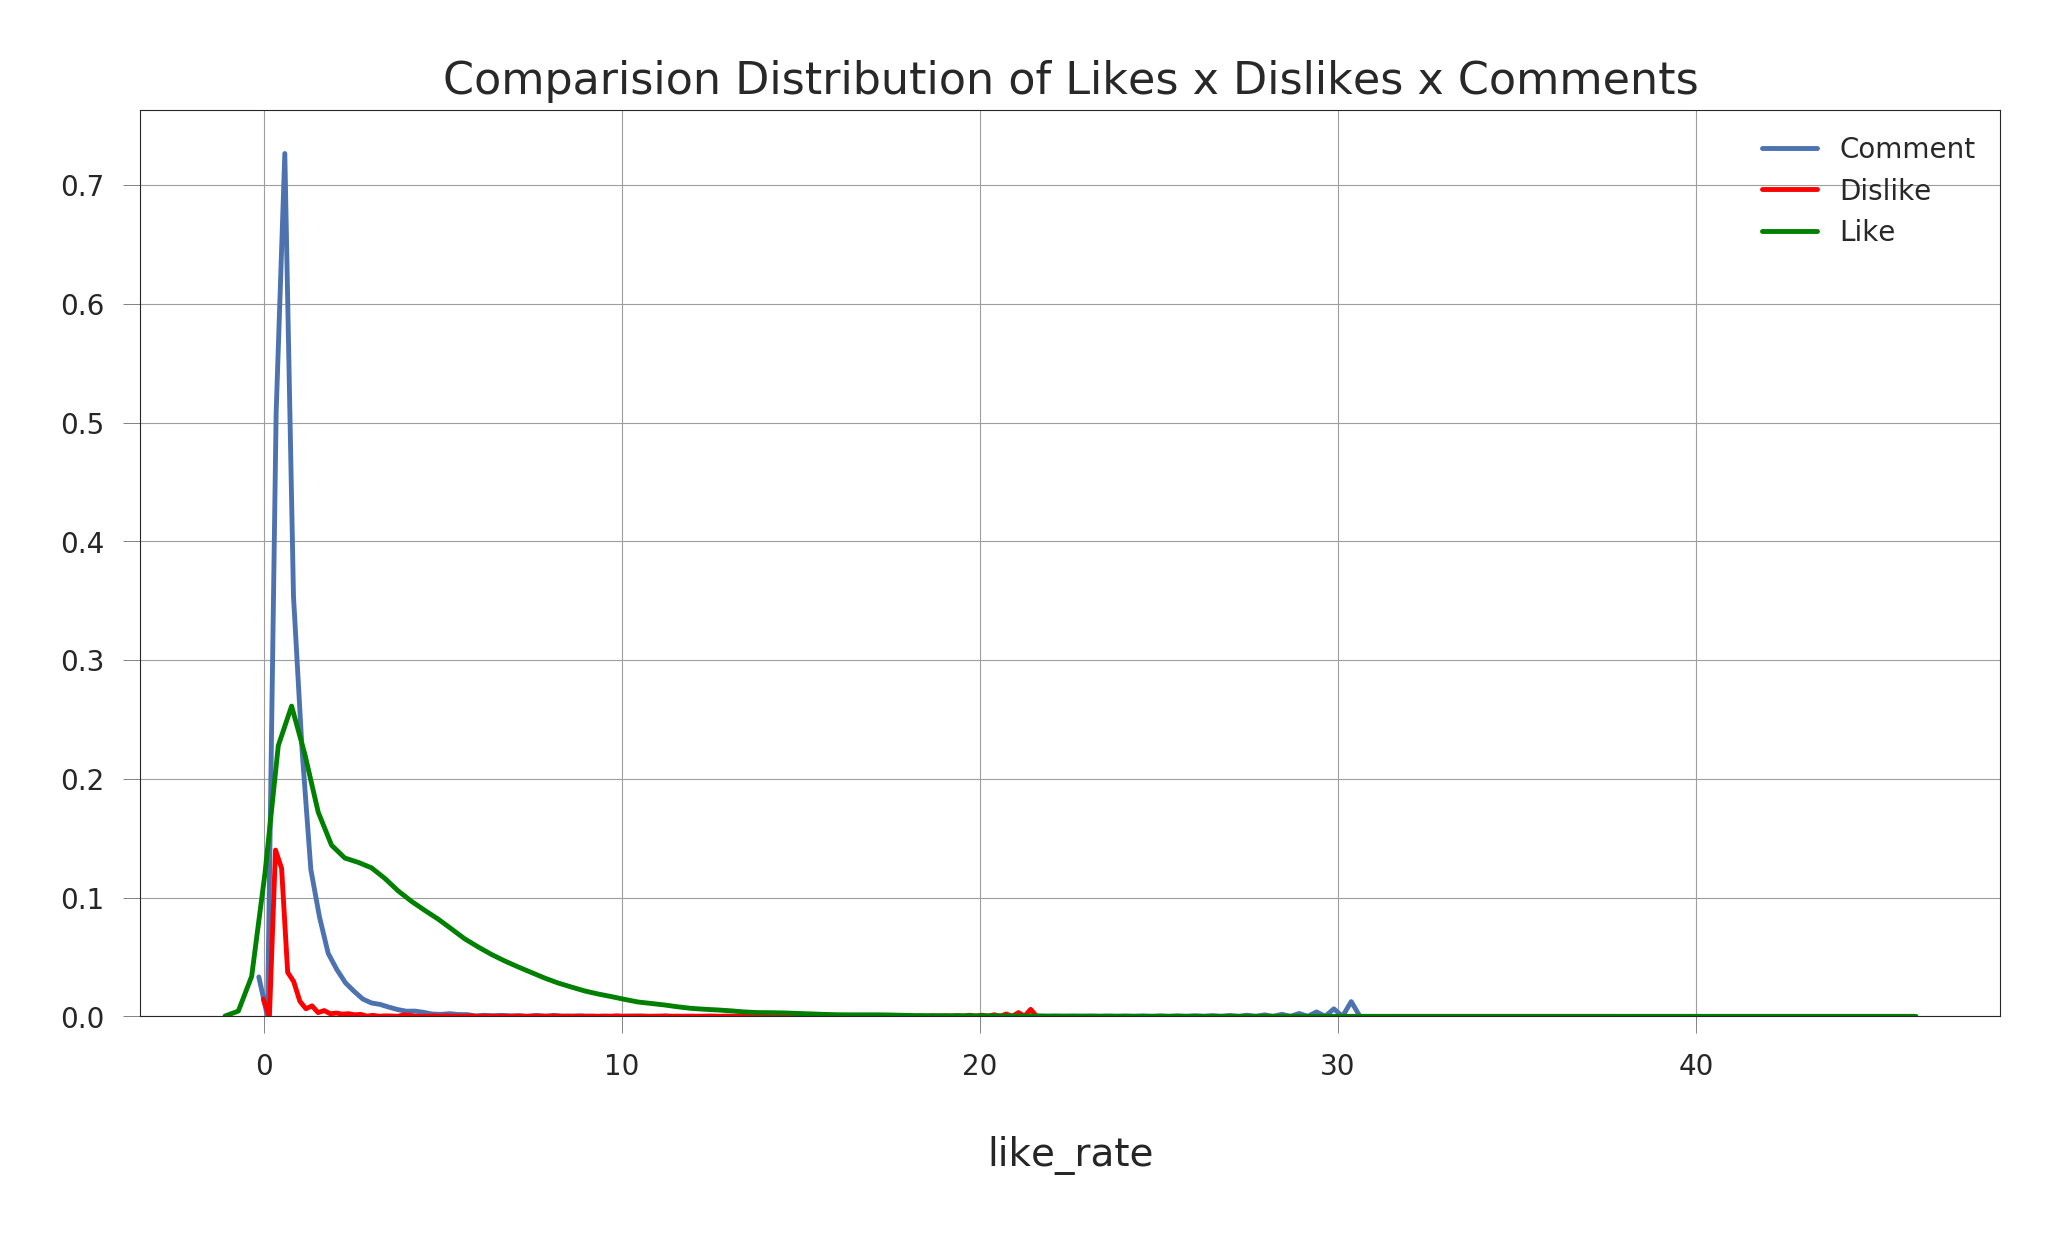

In [25]:
plt.figure(figsize=(12,6))
c1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
c1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
c1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")

c1.set_title('Comparision Distribution of Likes x Dislikes x Comments', fontsize=16)
plt.legend()
plt.show();

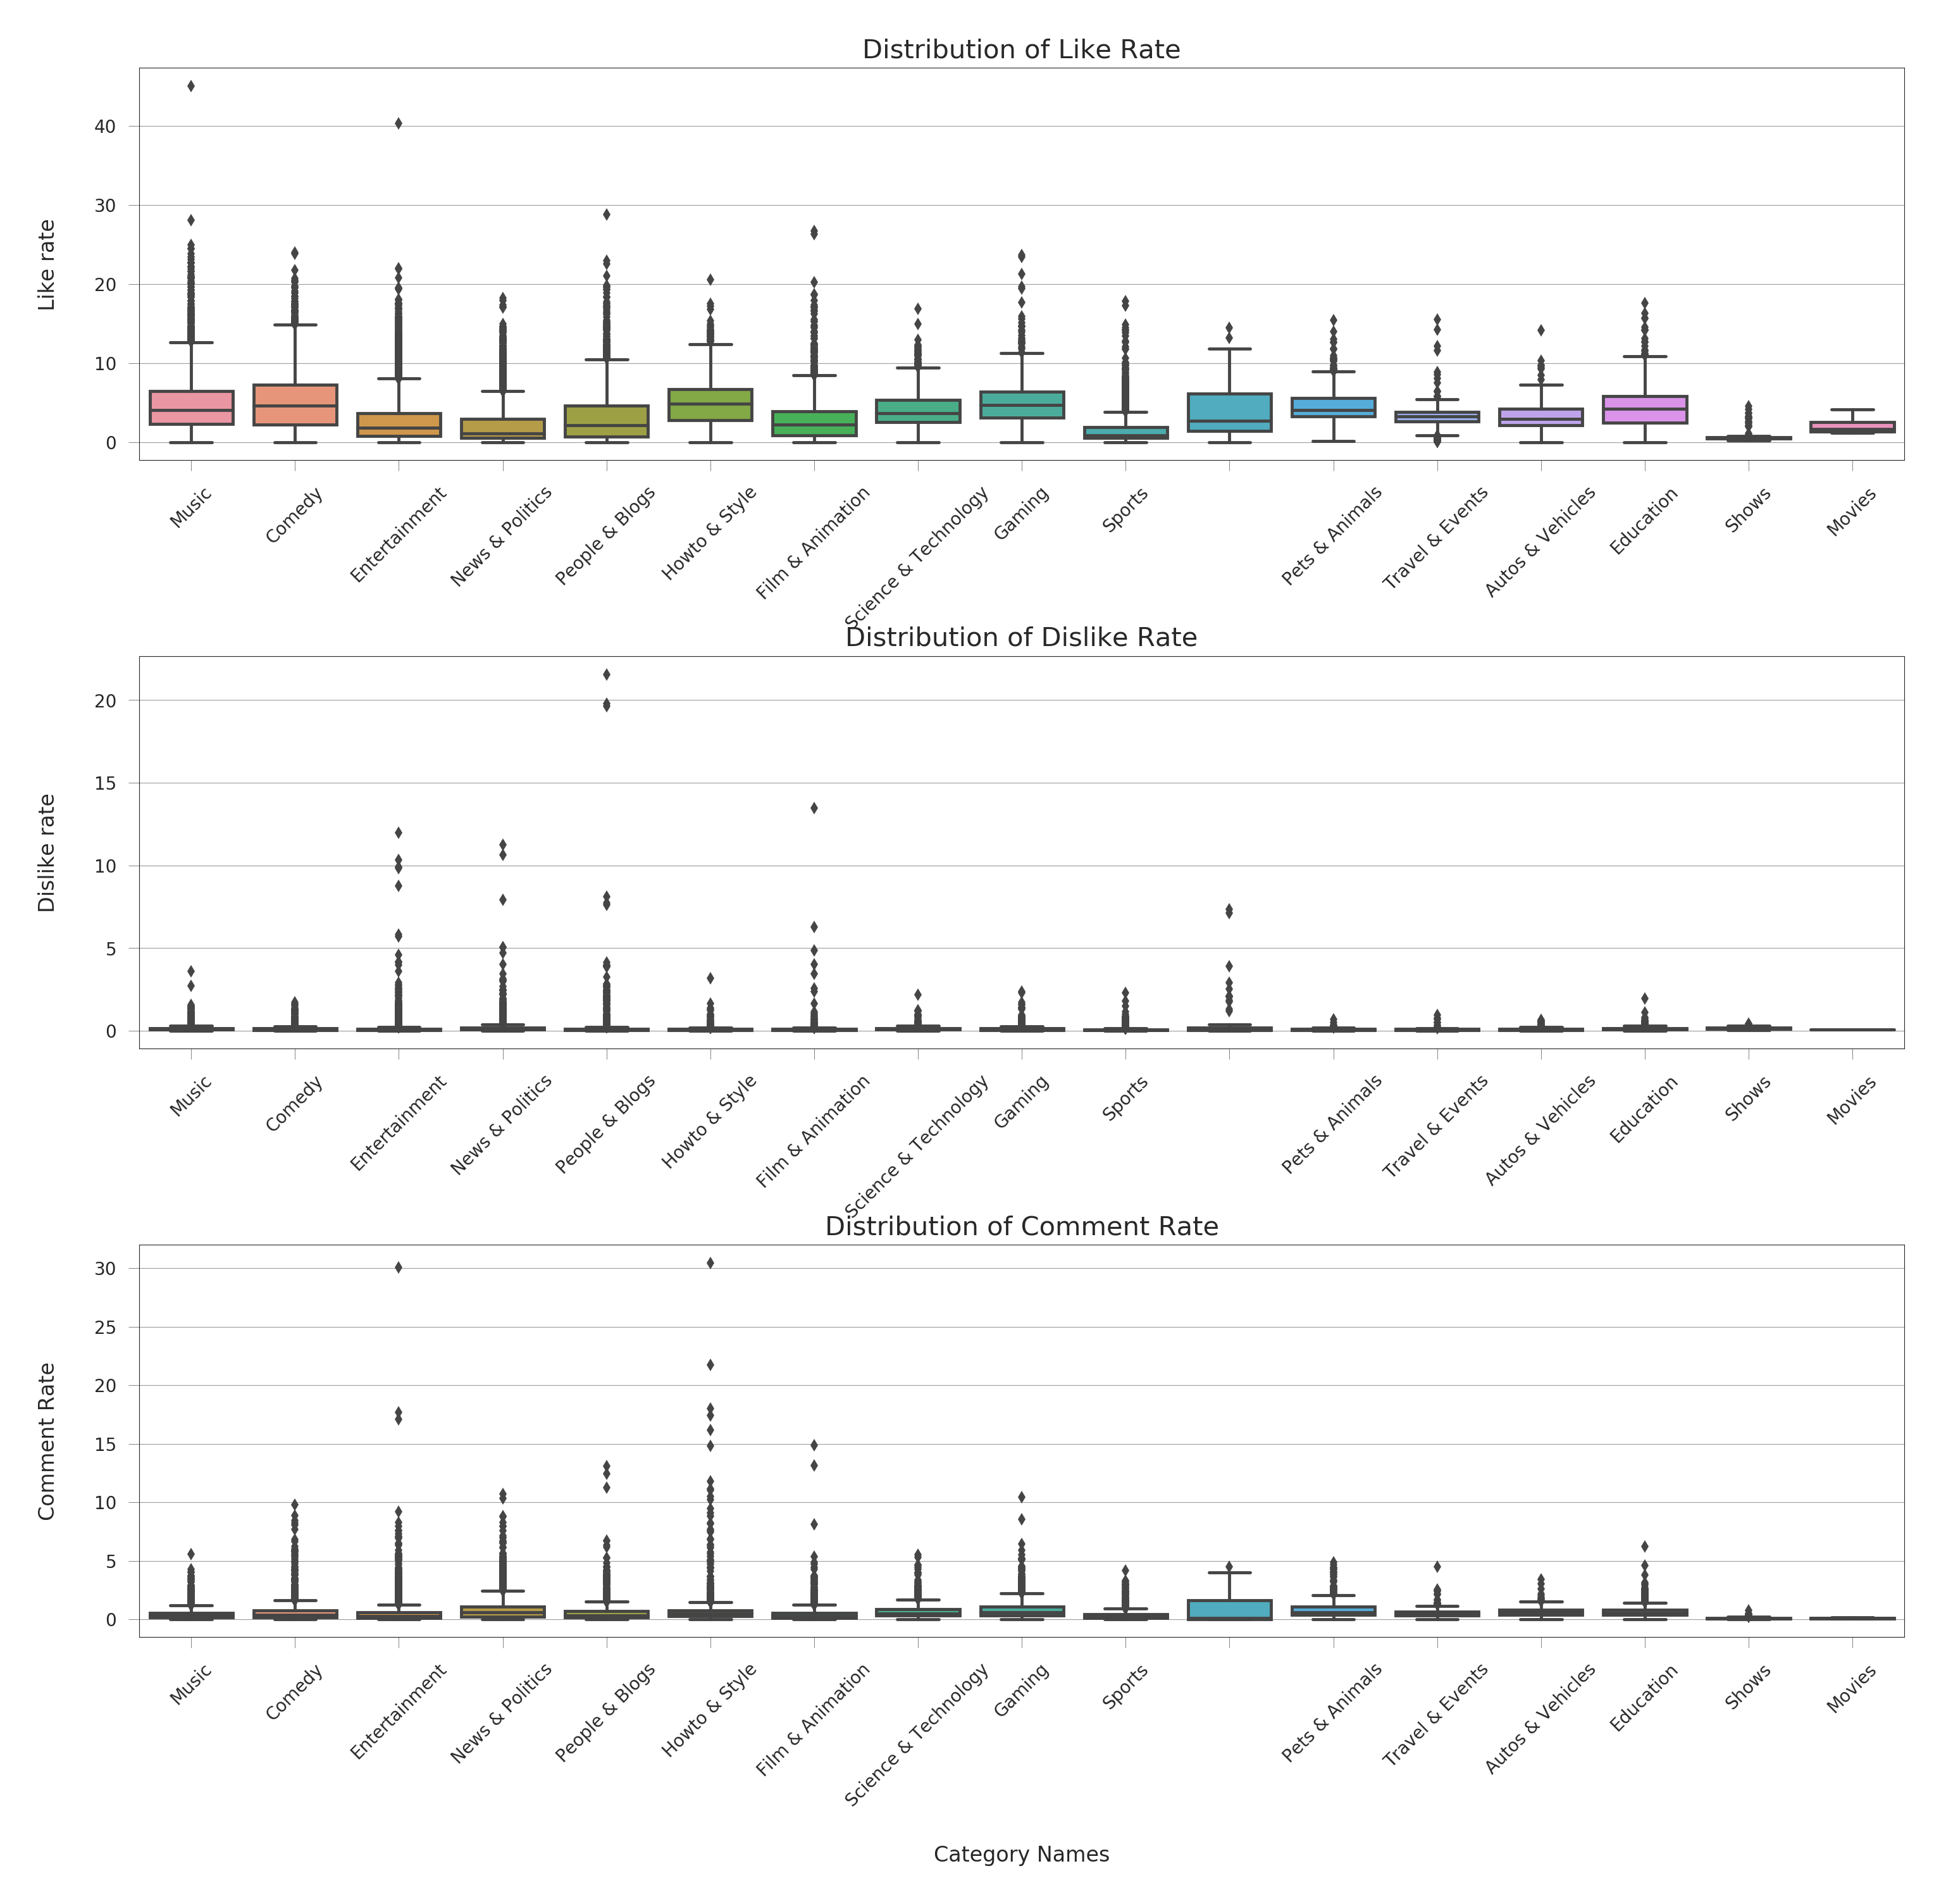

In [26]:
plt.figure(figsize=(18,16))

plt.subplot(311)
r1= sns.boxplot(x='category_name',y='like_rate',  data=df)
r1.set_xticklabels(g.get_xticklabels(),rotation=45)
r1.set_title("Distribution of Like Rate", fontsize=15)
r1.set_xlabel("", fontsize=12)
r1.set_ylabel("Like rate", fontsize=12)


plt.subplot(312)
r2= sns.boxplot(y='dislike_rate', x='category_name', data=df)
r2.set_xticklabels(g.get_xticklabels(),rotation=45)
r2.set_title("Distribution of Dislike Rate", fontsize=15)
r2.set_xlabel("", fontsize=12)
r2.set_ylabel("Dislike rate", fontsize=12)


plt.subplot(313)
r3= sns.boxplot(y='comment_rate', x='category_name', data=df)
r3.set_xticklabels(g.get_xticklabels(),rotation=45)
r3.set_title("Distribution of Comment Rate", fontsize=15)
r3.set_xlabel("Category Names", fontsize=12)
r3.set_ylabel("Comment Rate", fontsize=12)


plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.9)
plt.show();

In [27]:
df.corr()

views  likes  dislikes  comment_count  \
views                    1.00   0.83      0.56           0.69   
likes                    0.83   1.00      0.46           0.84   
dislikes                 0.56   0.46      1.00           0.64   
comment_count            0.69   0.84      0.64           1.00   
comments_disabled        0.00  -0.02     -0.01          -0.03   
ratings_disabled         0.01  -0.02     -0.01          -0.02   
video_error_or_removed   0.00   0.00      0.00           0.00   
likes_log                0.40   0.45      0.16           0.32   
views_log                0.52   0.45      0.19           0.33   
dislikes_log             0.46   0.44      0.24           0.35   
comment_log              0.36   0.41      0.17           0.36   
like_rate                0.01   0.22      0.02           0.15   
dislike_rate             0.04   0.07      0.25           0.13   
comment_rate            -0.05   0.05      0.03           0.20   

                        comments_disabled  ratings_disabled  \
views                                0.00              0.01   
likes                               -0.02             -0.02   
dislikes                            -0.01             -0.01   
comment_count                       -0.03             -0.02   
comments_disabled                    1.00              0.15   
ratings_disabled                     0.15              1.00   
video_error_or_removed              -0.00             -0.00   
likes_log                           -0.13             -0.35   
views_log                           -0.05             -0.04   
dislikes_log                        -0.08             -0.26   
comment_log                         -0.43             -0.10   
like_rate                           -0.08             -0.09   
dislike_rate                         0.02             -0.03   
comment_rate                        -0.09             -0.02   

                        video_error_or_removed  likes_log  views_log  \
views                                     0.00       0.40       0.52   
likes                                     0.00       0.45       0.45   
dislikes                                  0.00       0.16       0.19   
comment_count                             0.00       0.32       0.33   
comments_disabled                        -0.00      -0.13      -0.05   
ratings_disabled                         -0.00      -0.35      -0.04   
video_error_or_removed                    1.00      -0.01       0.00   
likes_log                                -0.01       1.00       0.79   
views_log                                 0.00       0.79       1.00   
dislikes_log                             -0.00       0.82       0.86   
comment_log                              -0.00       0.80       0.71   
like_rate                                -0.01       0.50       0.05   
dislike_rate                             -0.00       0.08       0.05   
comment_rate                             -0.00       0.12      -0.13   

                        dislikes_log  comment_log  like_rate  dislike_rate  \
views                           0.46         0.36       0.01          0.04   
likes                           0.44         0.41       0.22          0.07   
dislikes                        0.24         0.17       0.02          0.25   
comment_count                   0.35         0.36       0.15          0.13   
comments_disabled              -0.08        -0.43      -0.08          0.02   
ratings_disabled               -0.26        -0.10      -0.09         -0.03   
video_error_or_removed         -0.00        -0.00      -0.01         -0.00   
likes_log                       0.82         0.80       0.50          0.08   
views_log                       0.86         0.71       0.05          0.05   
dislikes_log                    1.00         0.73       0.15          0.29   
comment_log                     0.73         1.00       0.39          0.13   
like_rate                       0.15         0.39       1.00          0.06   
dislike

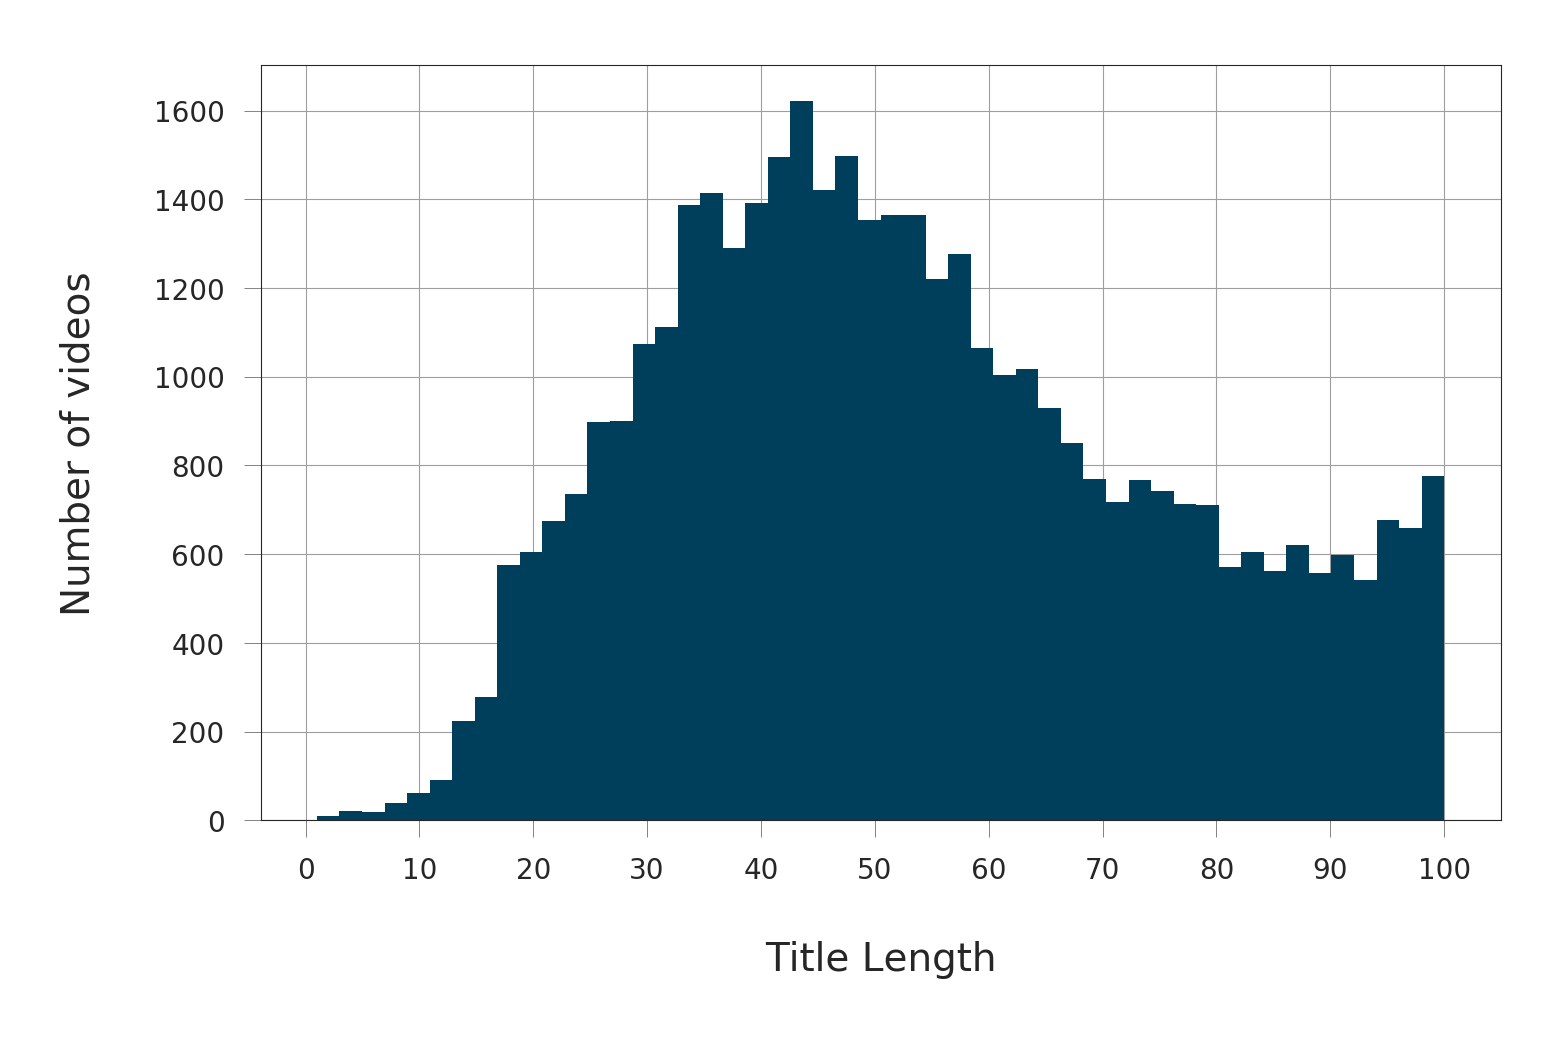

In [28]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

In [29]:
df['title'].value_counts()

Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018                15
Drake - God's Plan (Official Audio)                                                                     15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018       13
Deleted video                                                                                           11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                    10
Maroon 5 - Wait                                                                                          9
Nicki Minaj - Chun-Li                                                                                    9
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                             9
Eminem - River ft. Ed Sheeran                                                                            8
Marvel Studios' Avengers: Infinity Wa

In [30]:
df['comments_disabled'].value_counts()

False    40298
True       583
Name: comments_disabled, dtype: int64

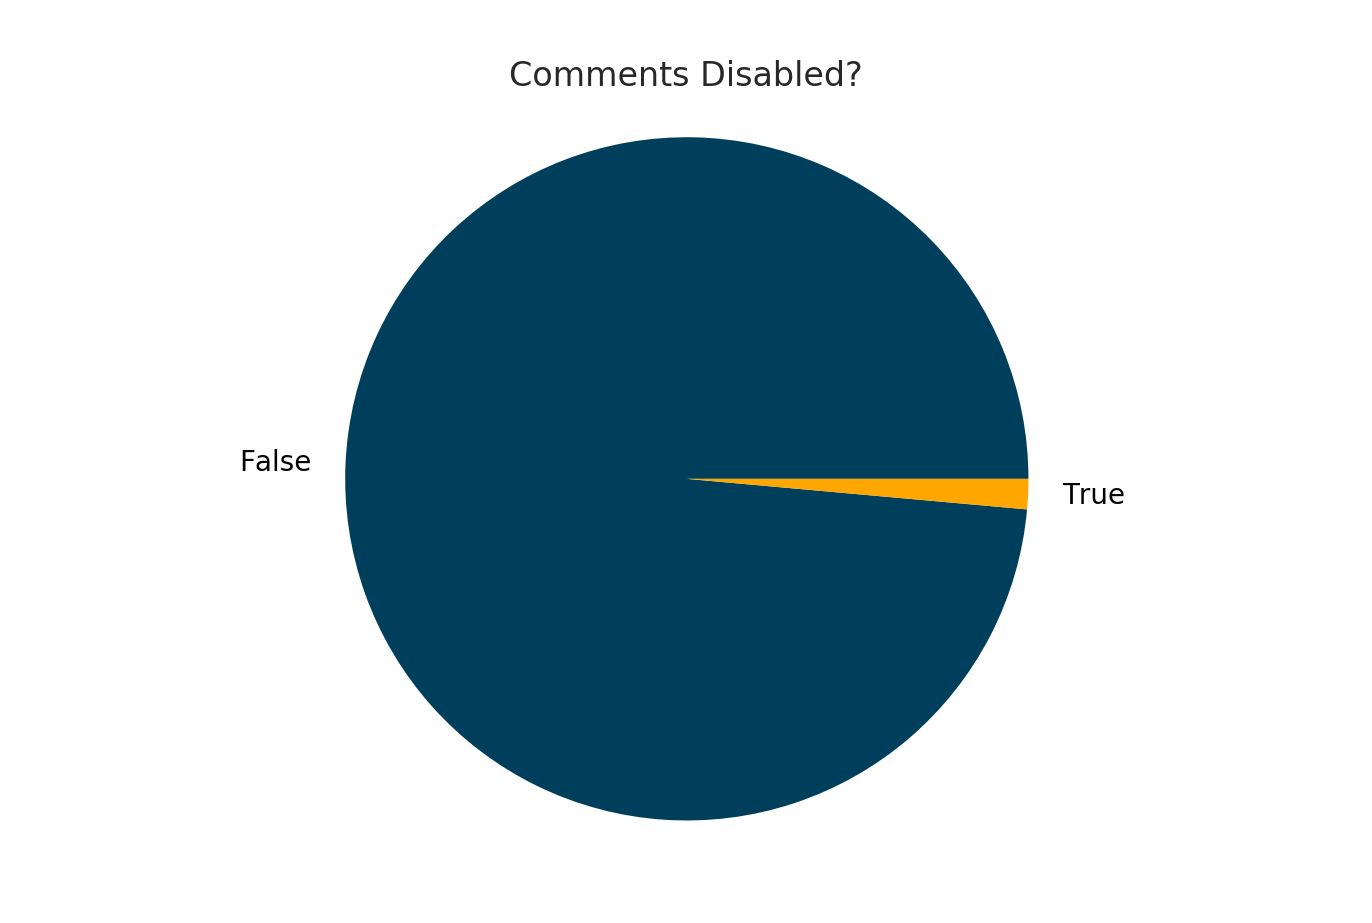

In [31]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

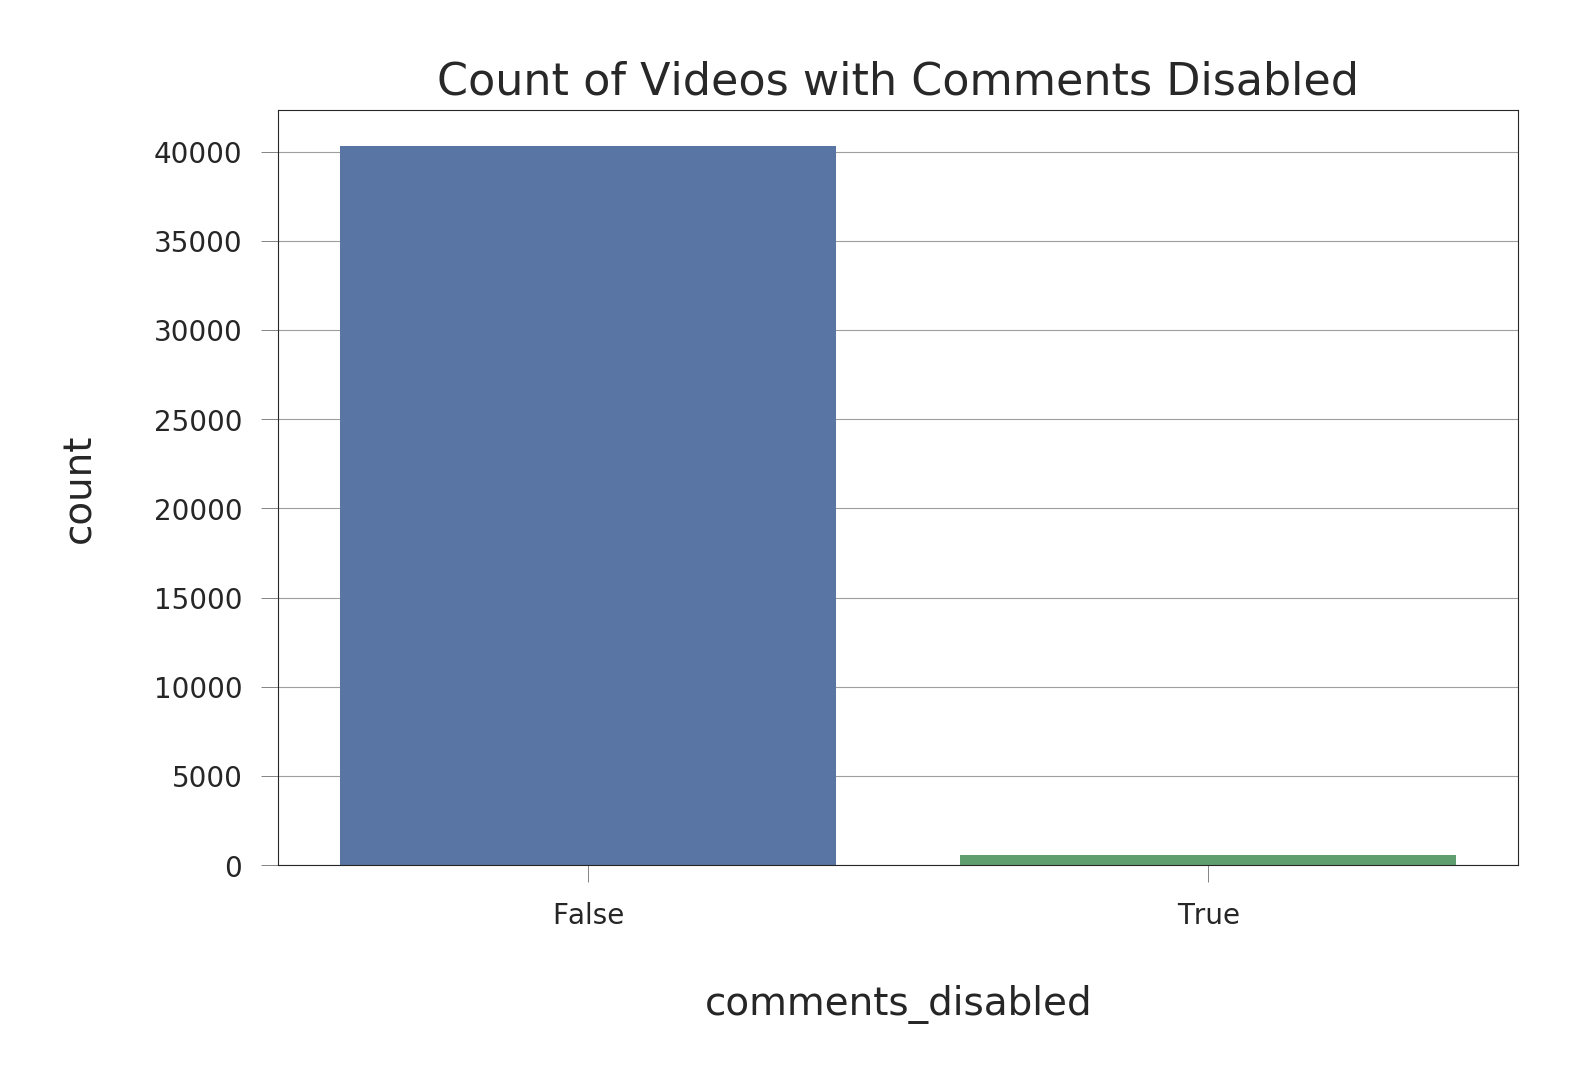

In [32]:
p1 = sns.countplot(x='comments_disabled', data=df)
p1.set_title("Count of Videos with Comments Disabled", fontsize=16);

In [33]:
df['ratings_disabled'].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

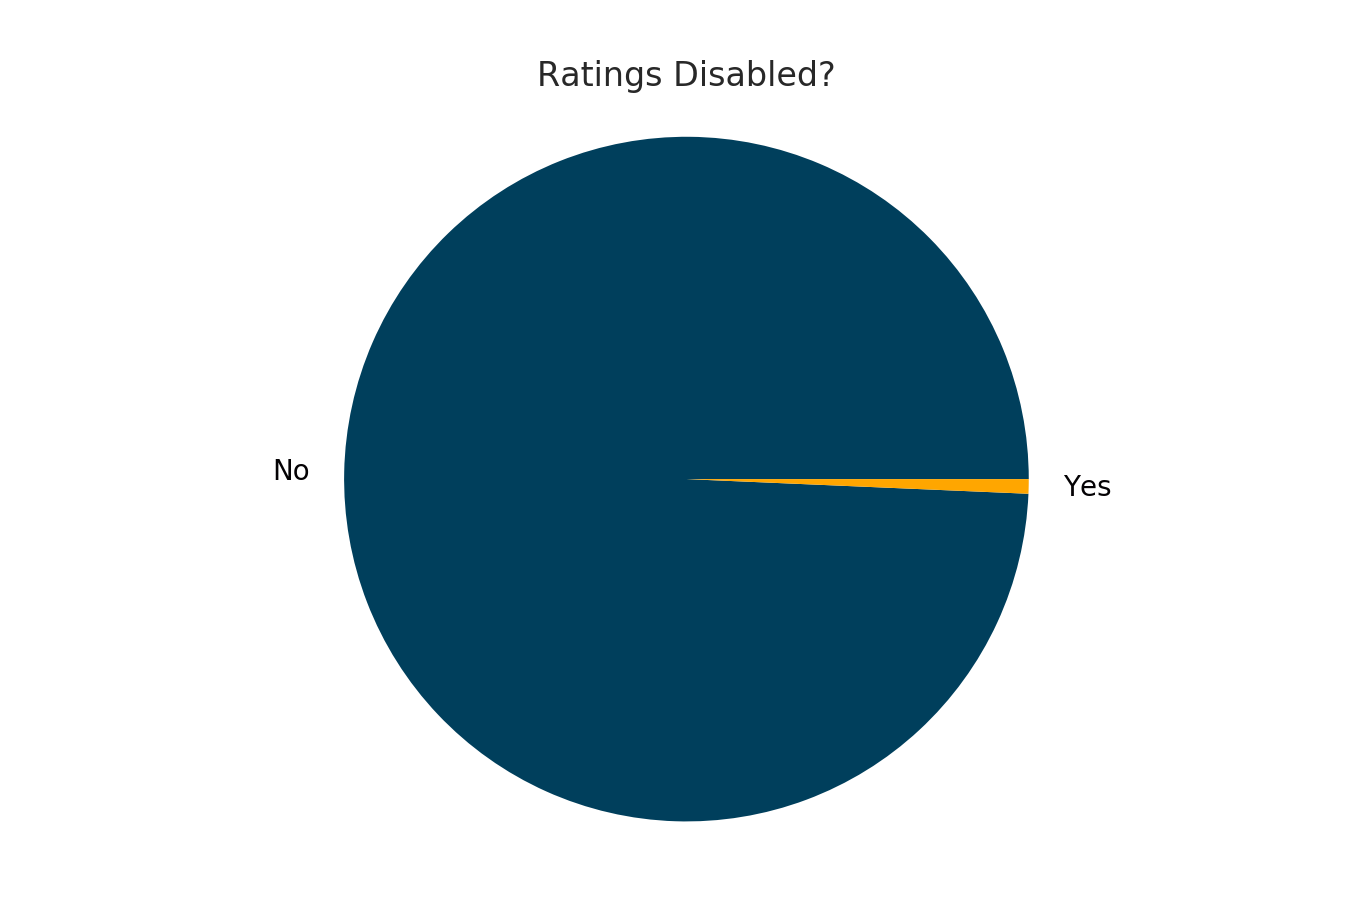

In [34]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled?');

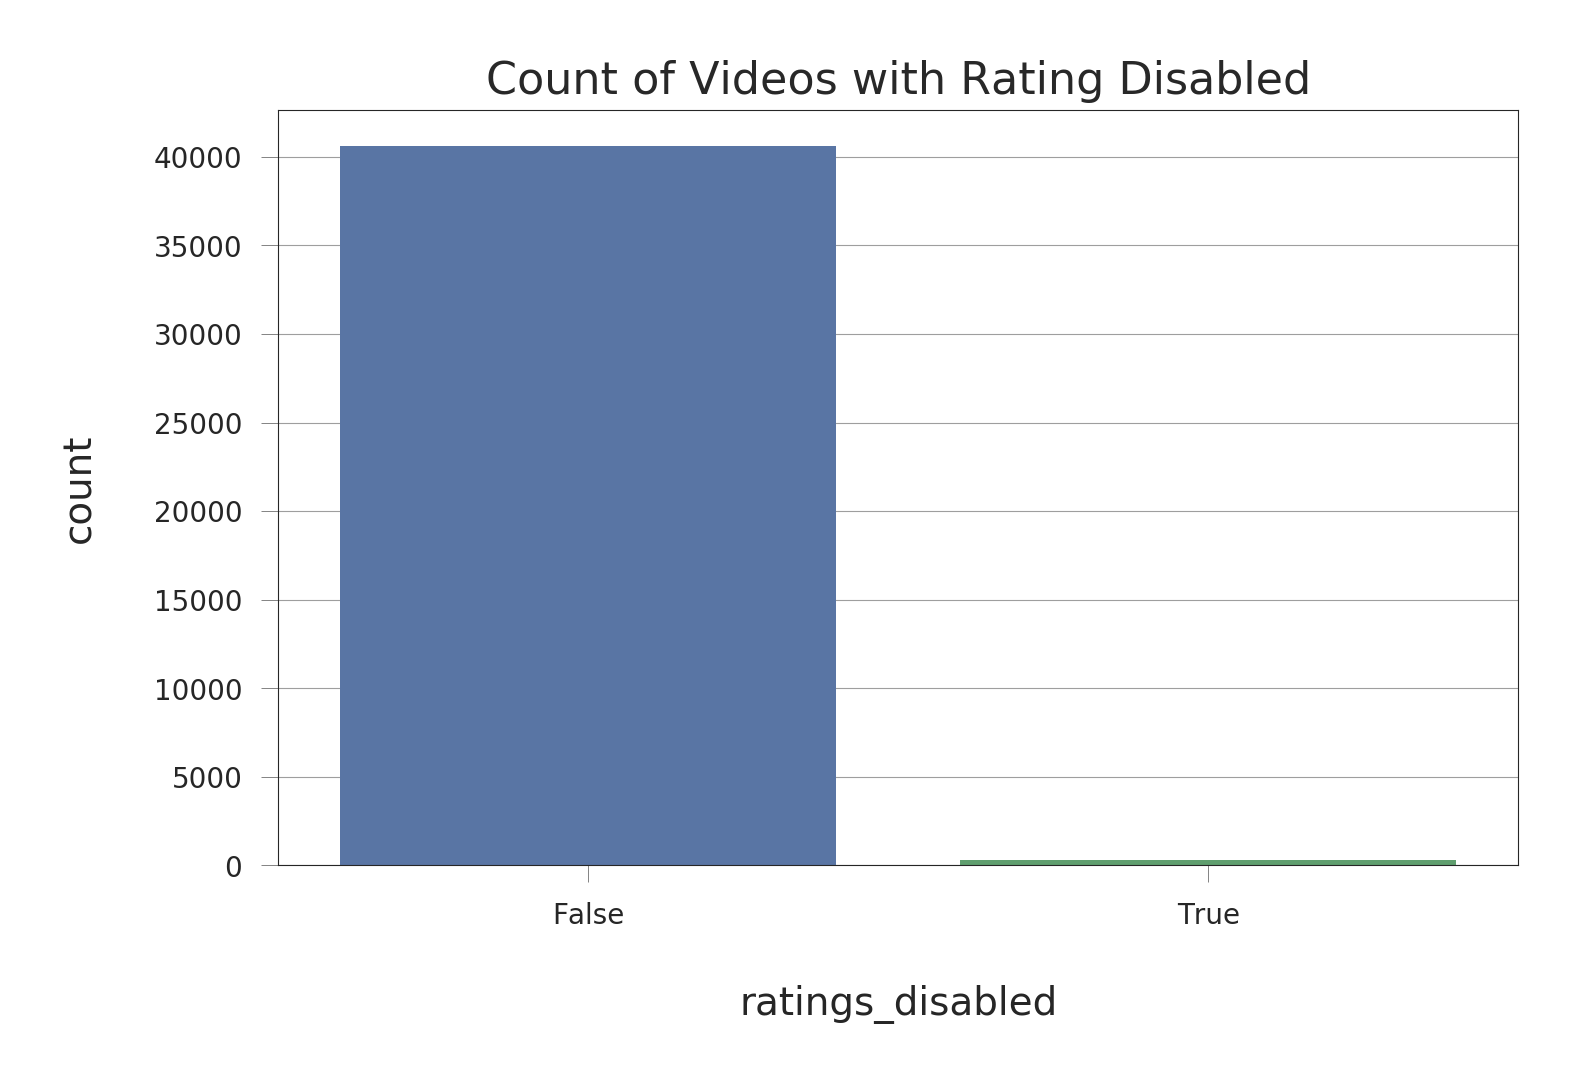

In [35]:
p2 = sns.countplot(x='ratings_disabled', data=df)
p2.set_title("Count of Videos with Rating Disabled", fontsize=16);

In [36]:
print("Videos that have both comments and ratings disabled")
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

Videos that have both comments and ratings disabled


63

In [37]:
df['video_error_or_removed'].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

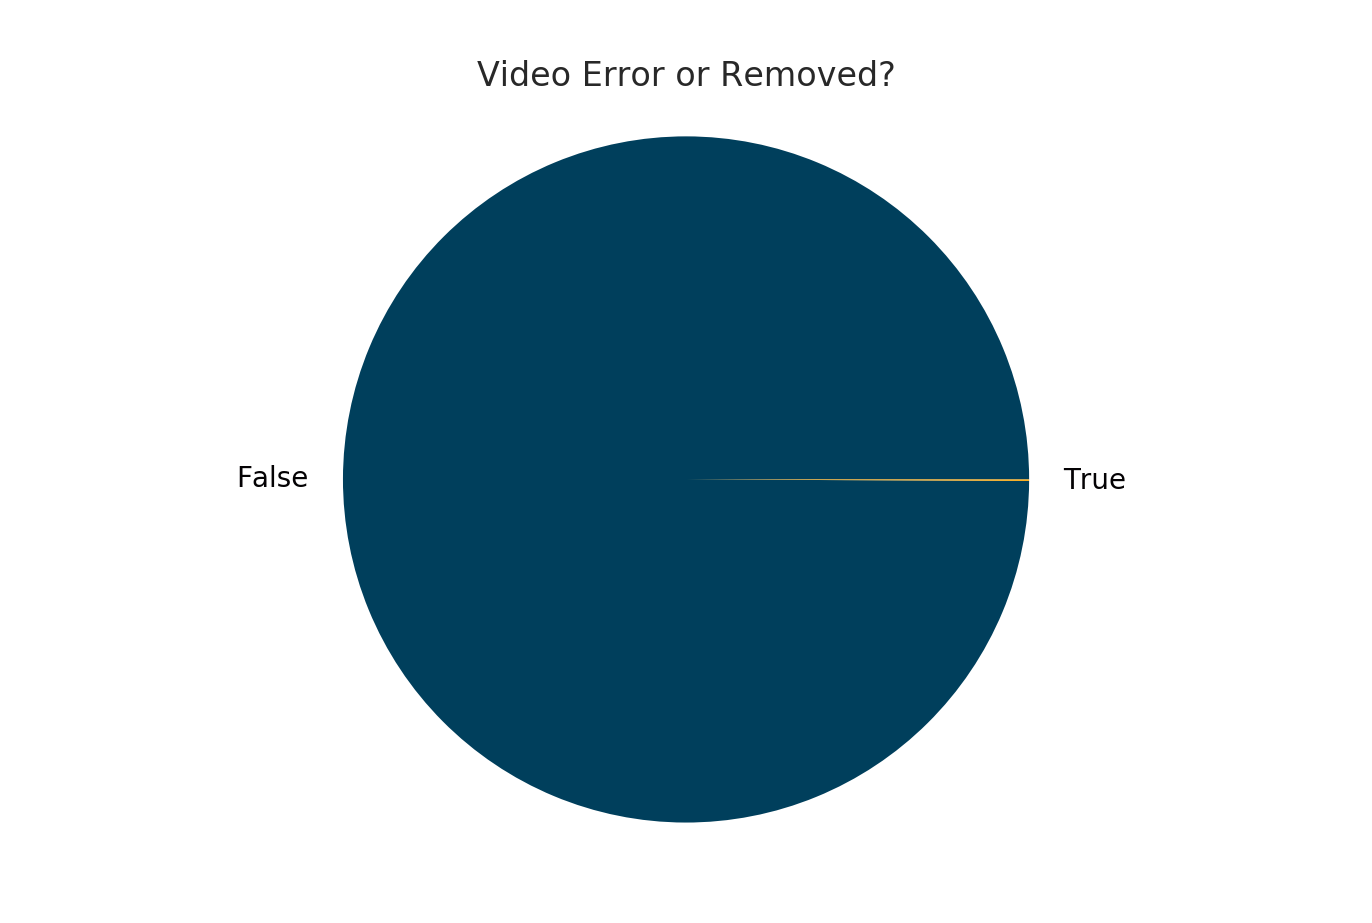

In [38]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

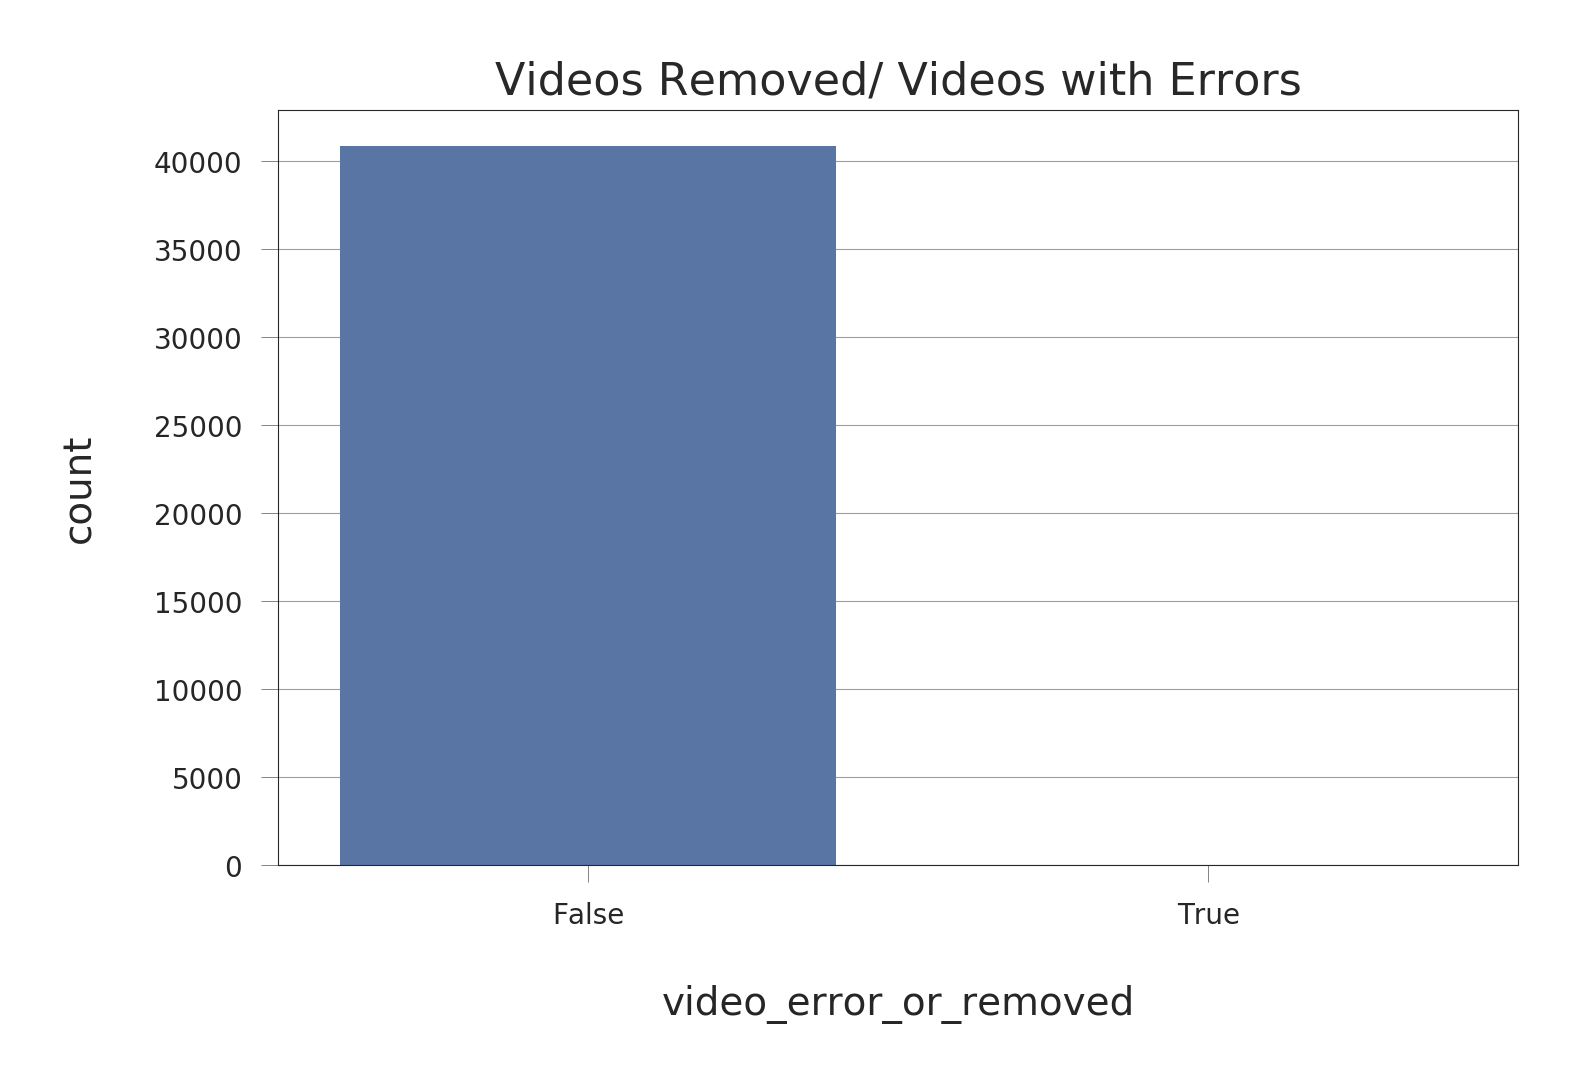

In [39]:
p3 = sns.countplot(x='video_error_or_removed', data=df)
p3.set_title("Videos Removed/ Videos with Errors", fontsize=16);

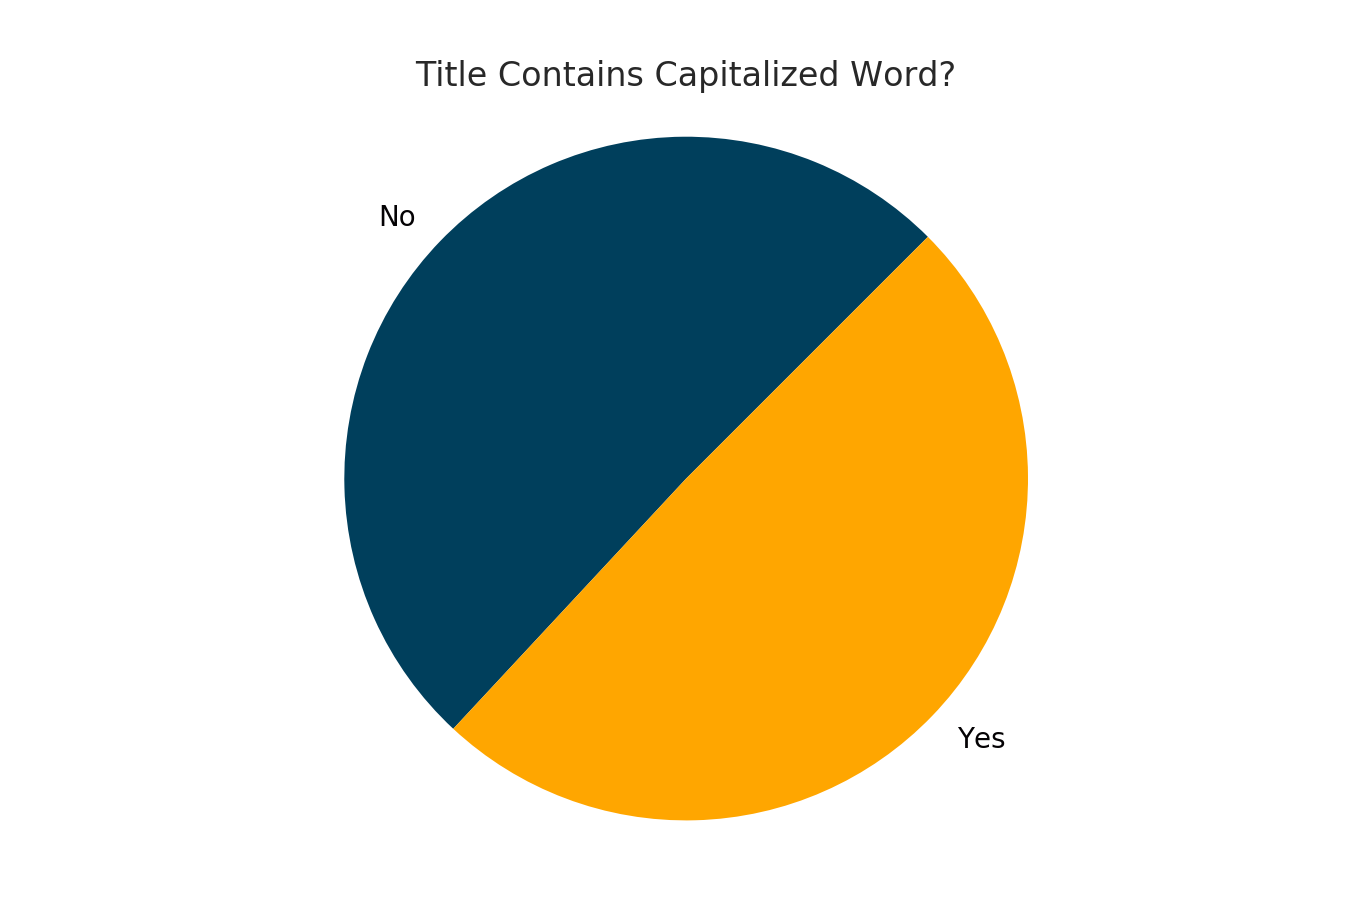

In [40]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?');

In [41]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

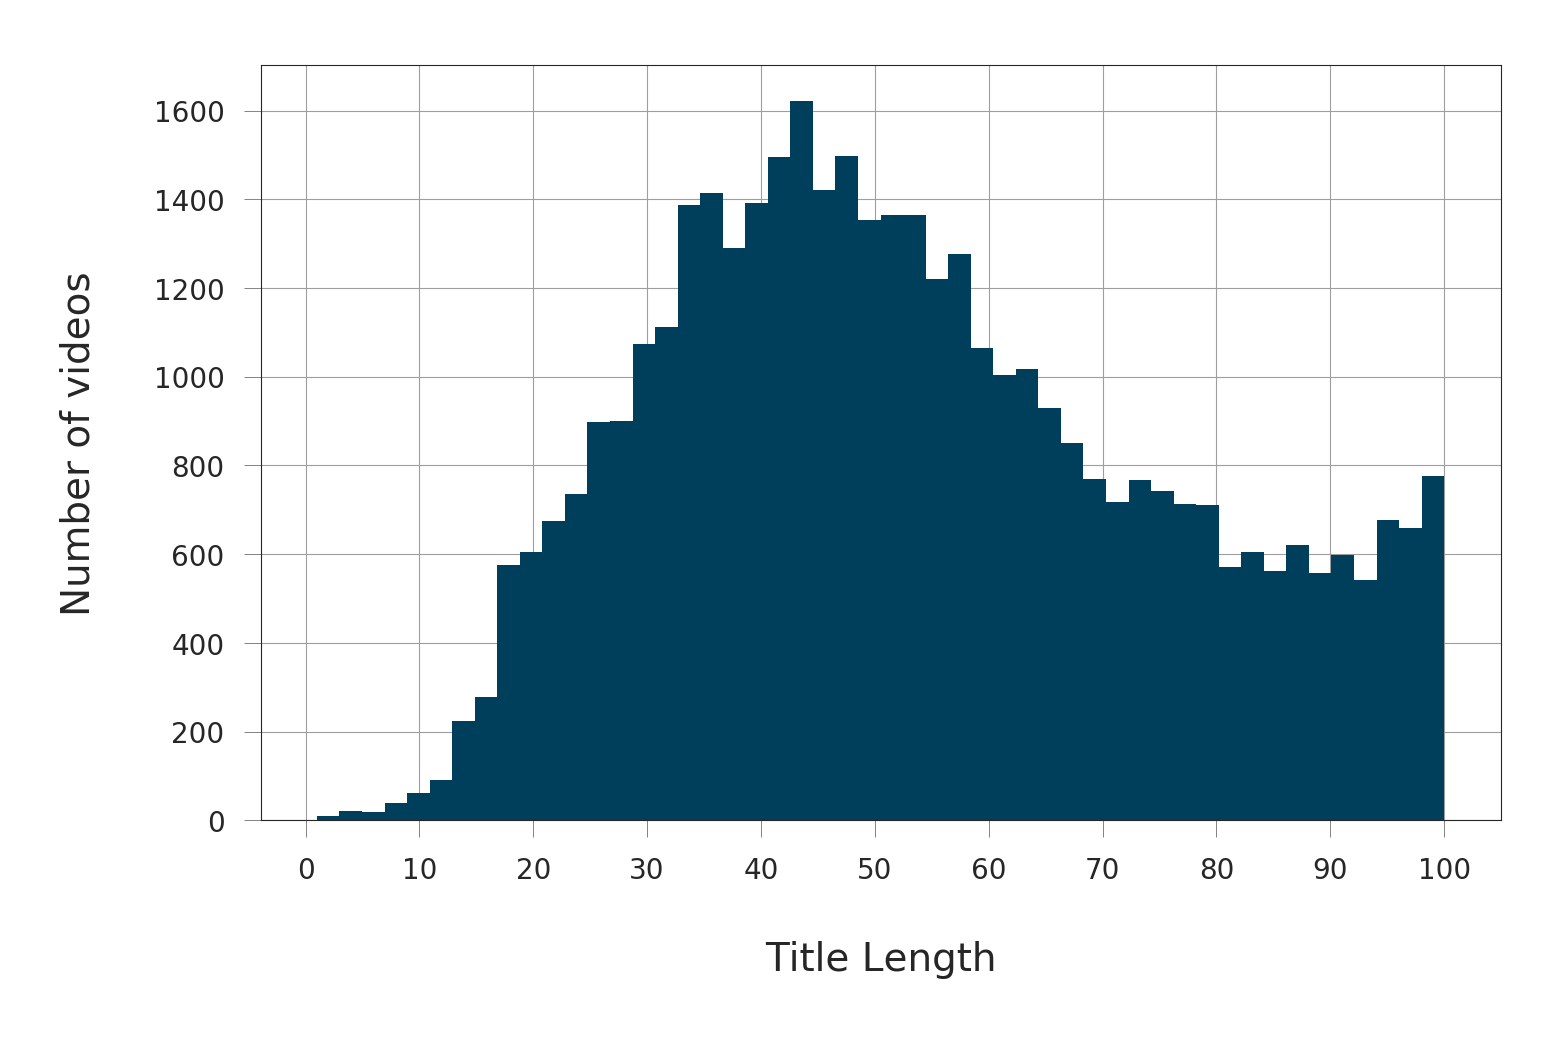

In [42]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

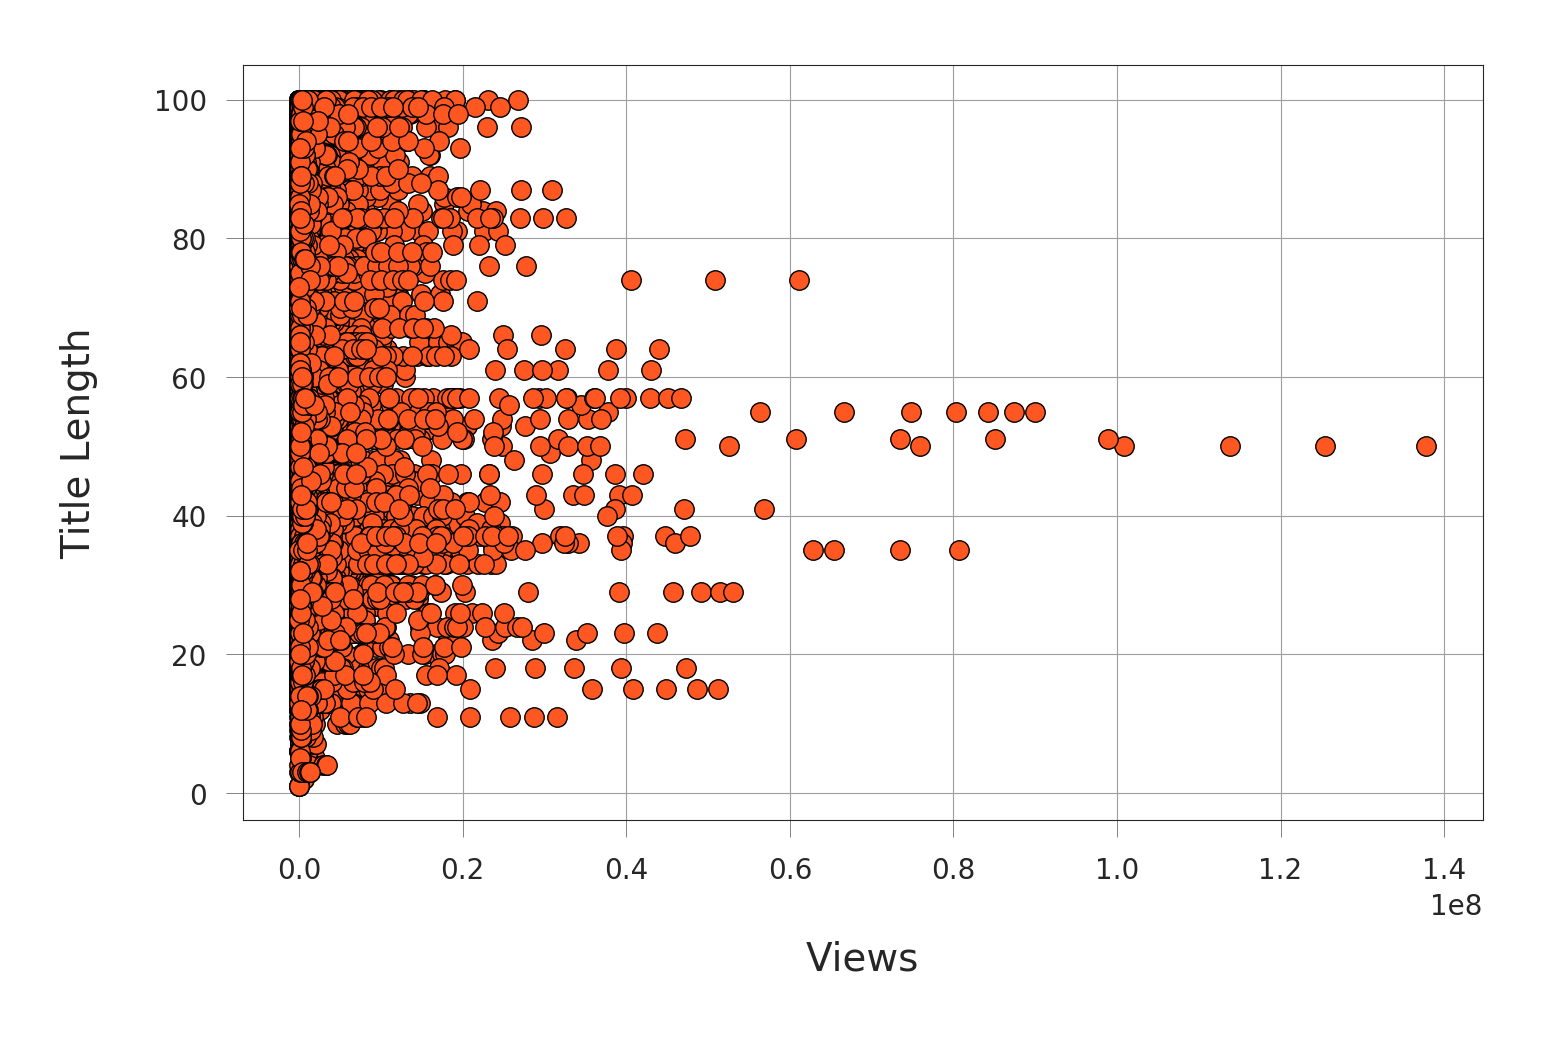

In [43]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length");

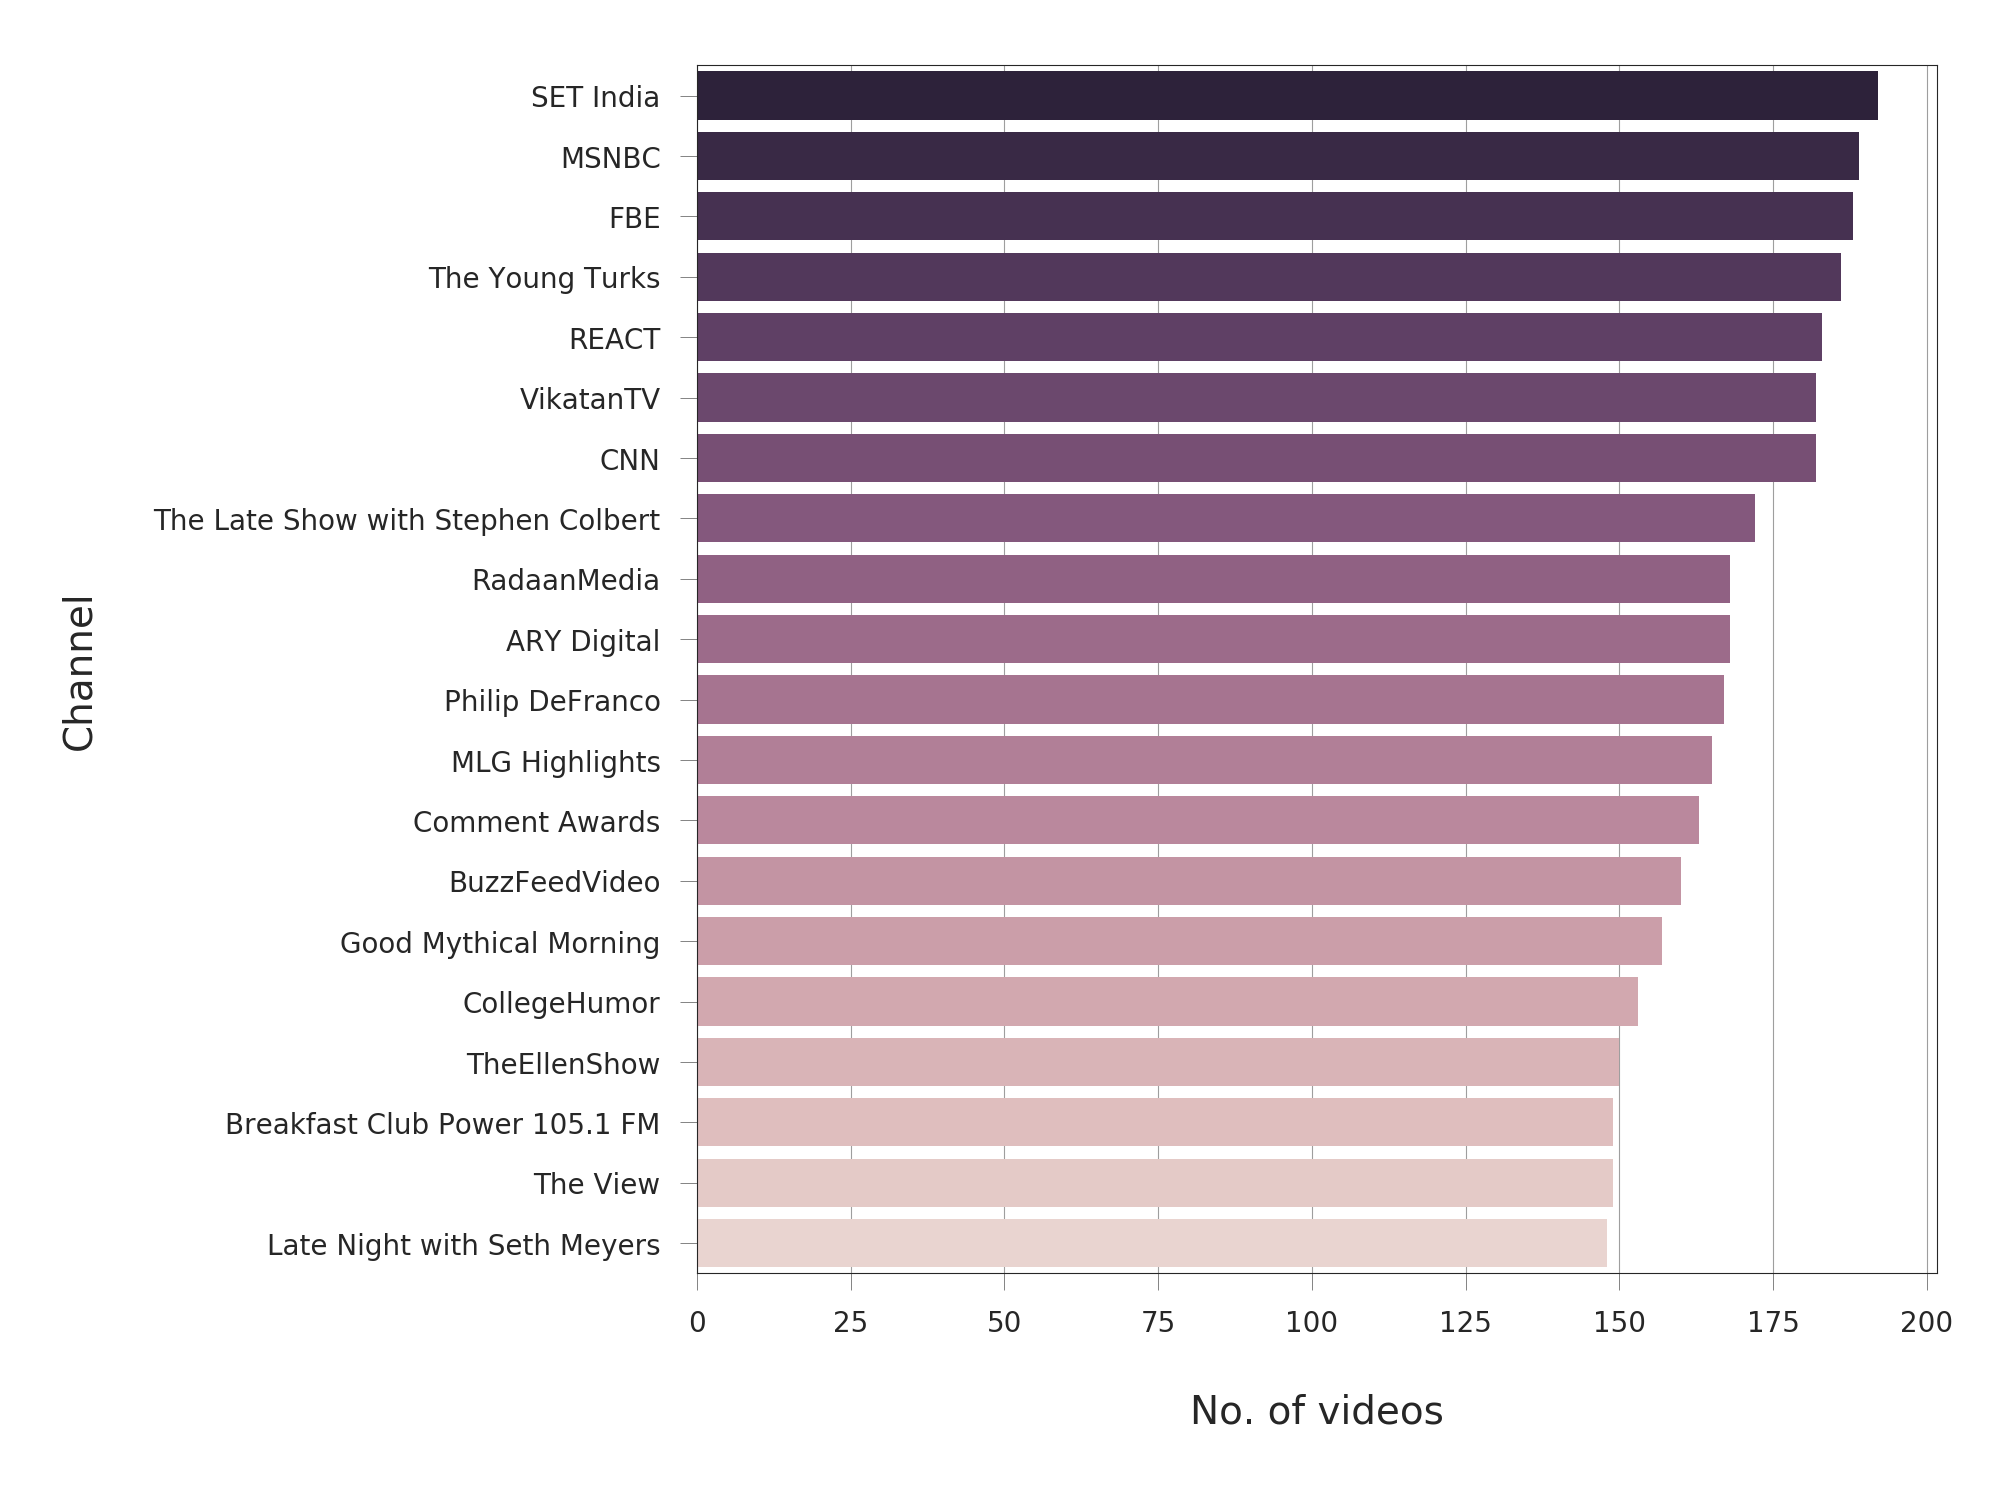

In [44]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="video_count", y="channel_title", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

In [45]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(5)

[('-', 12666), ('|', 12596), ('The', 5167), ('2018', 3765), ('the', 2498)]

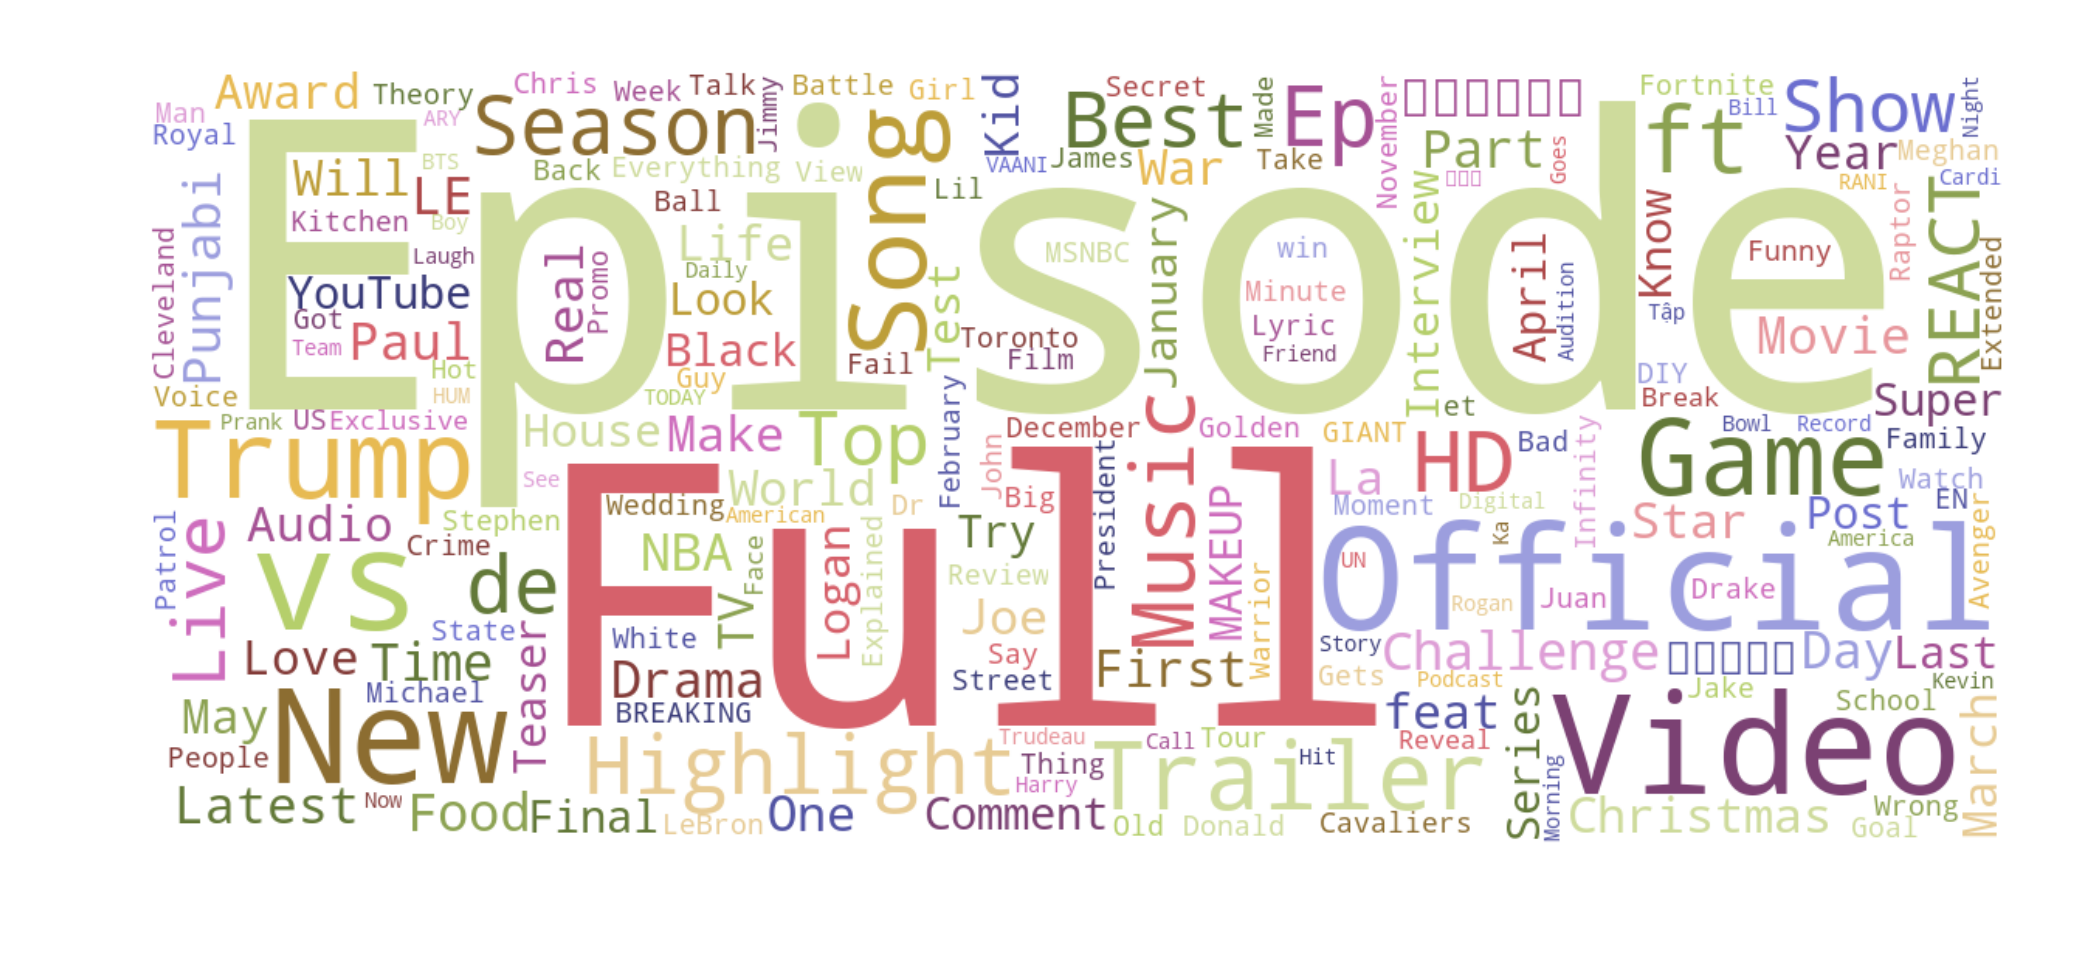

In [46]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [47]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

trending_date                                              title  \
video_id                                                                       
-IuqwJiuuj0    2017-12-05  Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...   
-IuqwJiuuj0    2017-12-06  Sau Ánh Hào Quang | Tập 10 FULL: Trấn Thành th...   

                           channel_title category_id        publish_time  \
video_id                                                                   
-IuqwJiuuj0  ĐÔNG TÂY PROMOTION OFFICIAL          24 2017-12-04 15:09:14   
-IuqwJiuuj0  ĐÔNG TÂY PROMOTION OFFICIAL          24 2017-12-04 15:09:14   

                                                          tags    views  \
video_id                                                                  
-IuqwJiuuj0  sau anh hao quang|"sau ánh hào quang"|"sau anh...   742343   
-IuqwJiuuj0  sau anh hao quang|"sau ánh hào quang"|"sau anh...  1204074   

             likes  dislikes  comment_count          ...           \
video_id                                             ...            
-IuqwJiuuj0   7407       399           1551          ...            
-IuqwJiuuj0  10003       578           2020          ...            

             category_name  likes_log  views_log  dislikes_log comment_log  \
video_id                                                                     
-IuqwJiuuj0  Entertainment       8.91      13.52          5.99        7.35   
-IuqwJiuuj0  Entertainment       9.21      14.00          6.36        7.61   

            like_rate  dislike_rate  comment_rate  title_length  \
video_id                                                          
-IuqwJiuuj0      1.00          0.05          0.21            83   
-IuqwJiuuj0      0.83          0.05          0.17            94   

             contains_capitalized  
video_id                           
-IuqwJiuuj0                  True  
-IuqwJiuuj0                  True  

[2 rows x 25 columns]

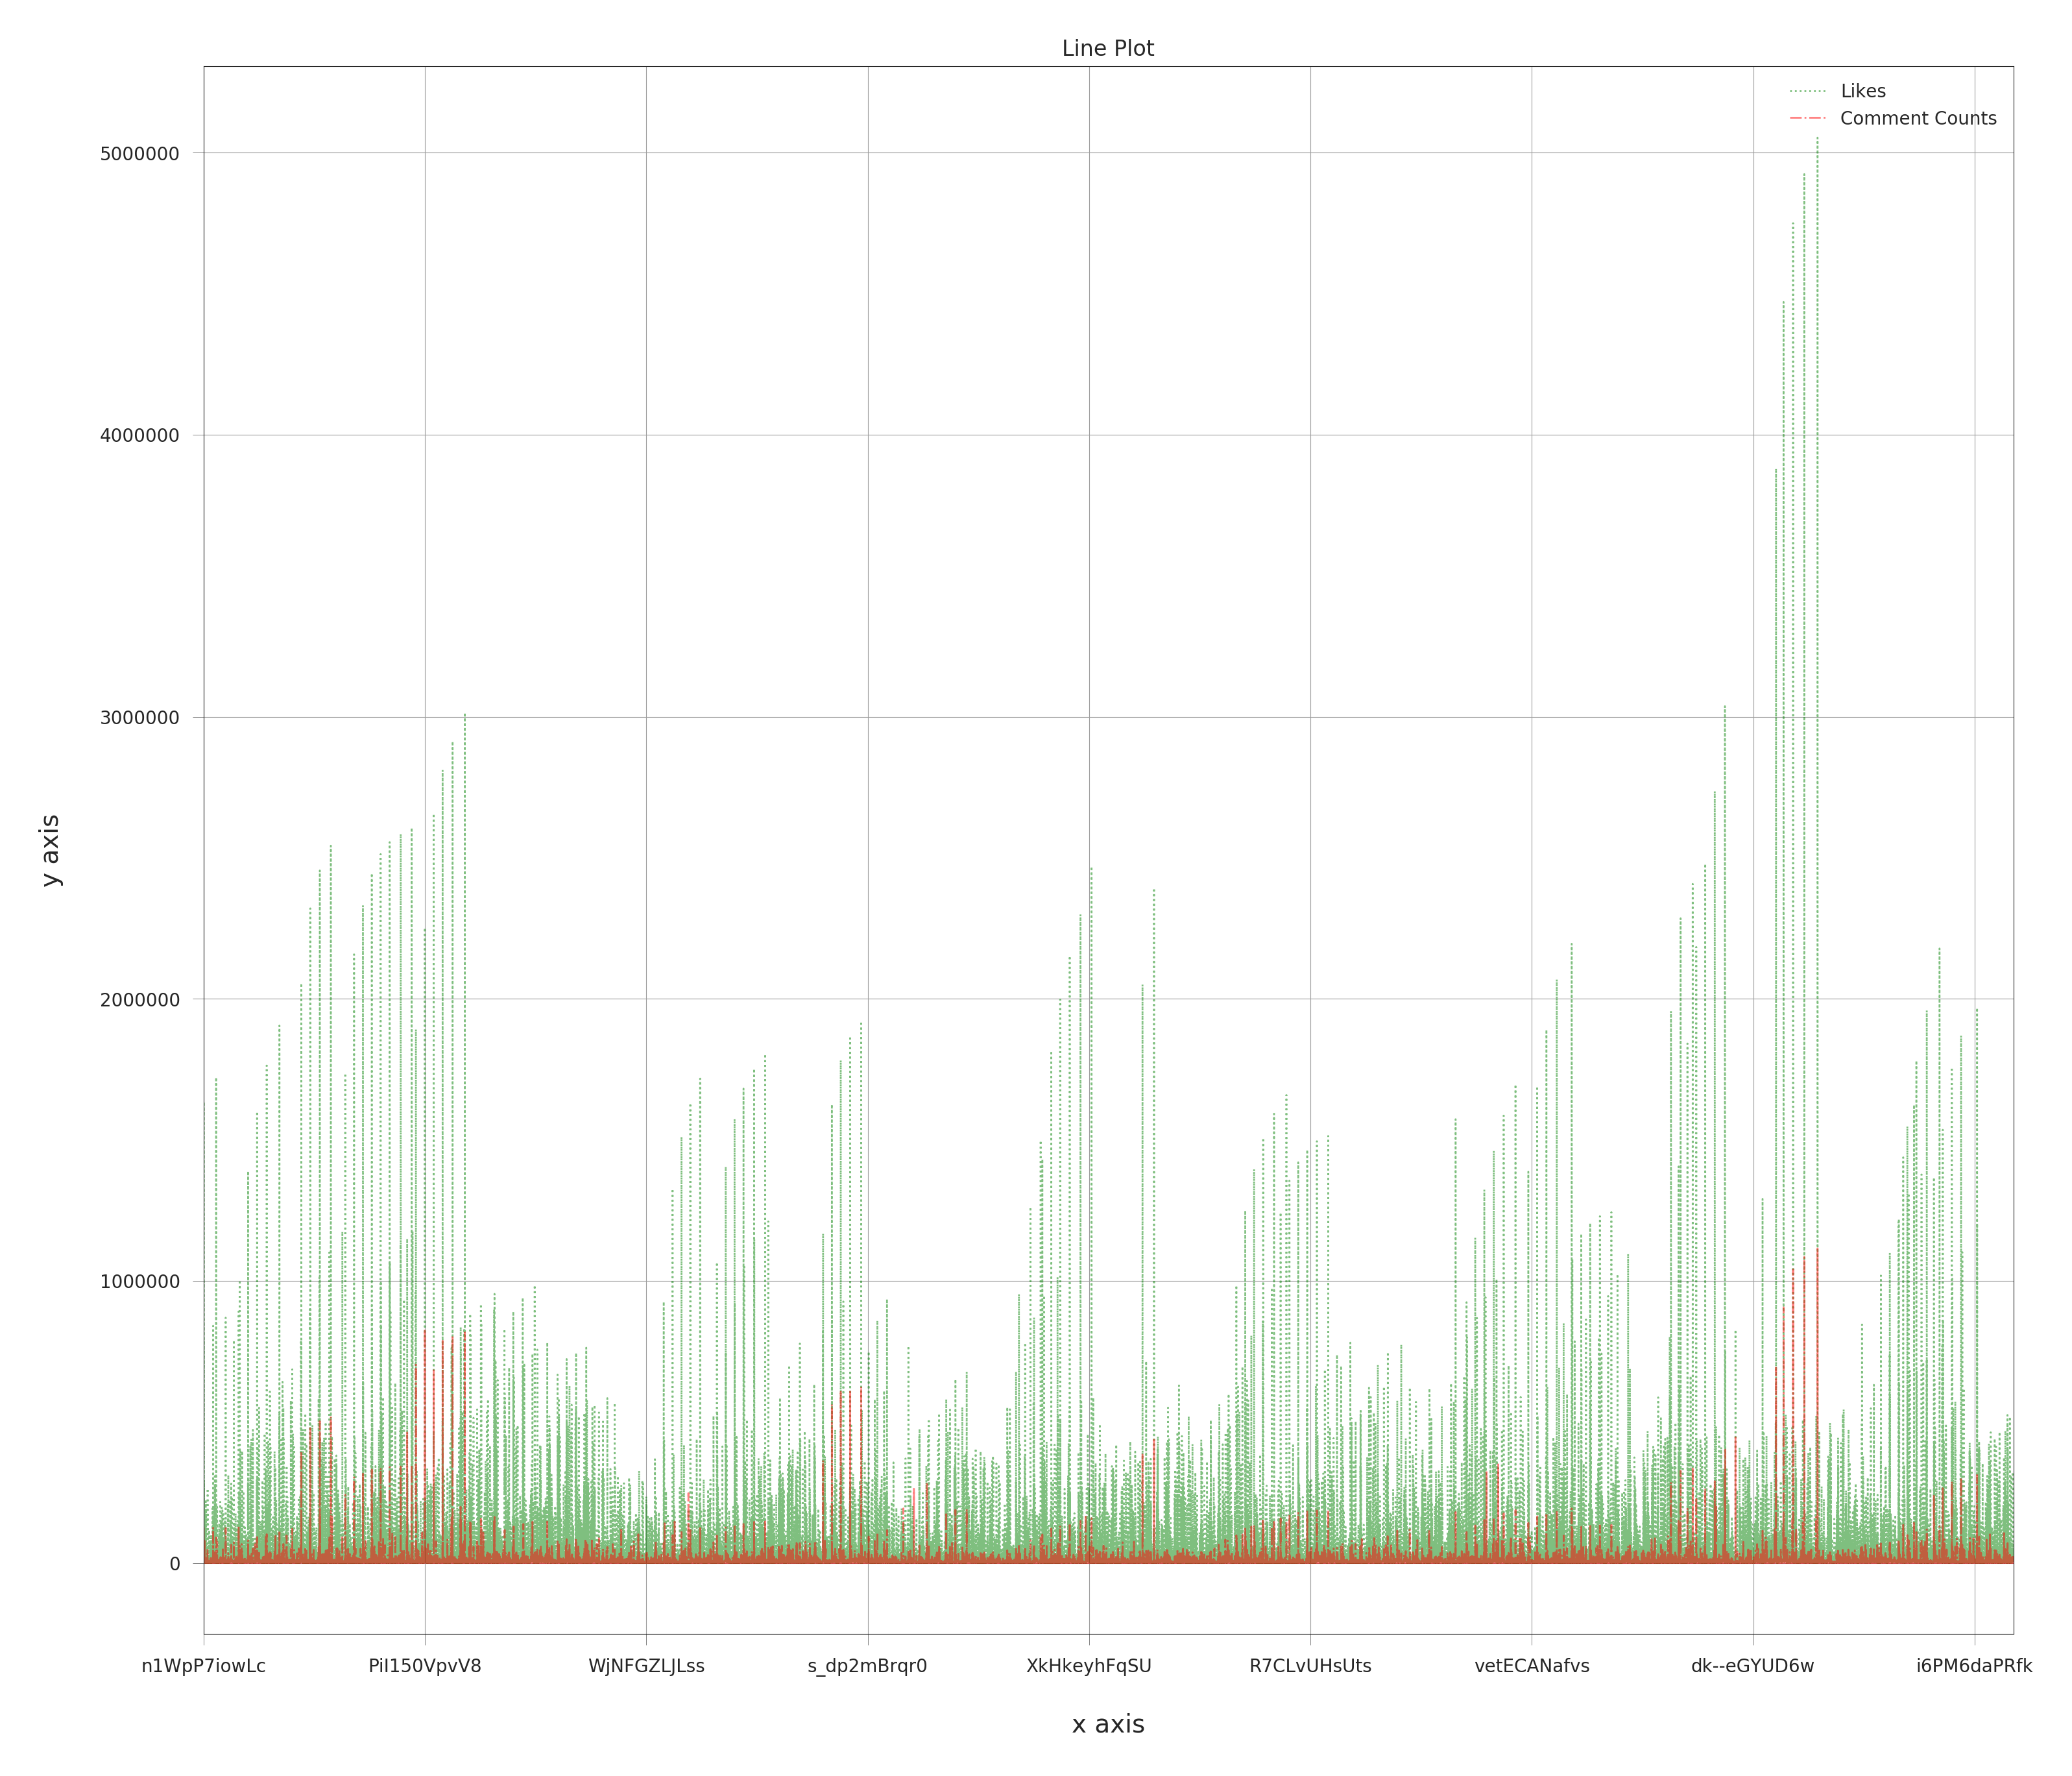

In [48]:
plt.figure(figsize=(18,16))

df.likes.plot(kind = 'line', color = 'g',label = 'Likes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
df.comment_count.plot(color = 'r',label = 'Comment Counts',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')   
plt.xlabel('x axis')        
plt.ylabel('y axis')
plt.title('Line Plot')      
plt.show();